http://robotics.ethz.ch/~asl-datasets/segmap/segmap_data/training_datasets/
download dataset18 and dataset27

# Import libraries

In [1]:
# import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
# from __future__ import print_function
# import numpy as np
# import math
import os
# import numpy
# import numpy as np

# Function for loading data from files

segments_database - segments of data, labels_database - labels of classes ("other", "car", "building"), positions_database -
places of segments

merge_events_database - ?
matches_database - ?

In [2]:
folder=''

https://github.com/ethz-asl/segmap/blob/master/segmappy/segmappy/tools/import_export.py

In [3]:
def load_segments(folder=folder, filename="segments_database.csv"):
    # container
    segments = []

    # extract and store point data
    from pandas import read_csv

    file_path = os.path.join(folder, filename)
    extracted_data = read_csv(file_path, delimiter=" ").values

    segment_ids = extracted_data[:, 0].astype(int)
    duplicate_ids = extracted_data[:, 1].astype(int)
    points = extracted_data[:, 2:]

#     complete_ids = list(zip(segment_ids, duplicate_ids))
    id_changes = []
    for i in range(len(segment_ids)):
        if i > 0 and (segment_ids[i] != (segment_ids[i - 1]) or duplicate_ids[i]!=duplicate_ids[i-1]):
            id_changes.append(i)
#     complete_ids = list(zip(segment_ids, duplicate_ids))
#     id_changes = []
#     for i, complete_id in enumerate(complete_ids):
#         if i > 0 and complete_id != complete_ids[i - 1]:
#             id_changes.append(i)
            
    segments = np.split(points, id_changes)

    segment_ids = [ids[0] for ids in np.split(segment_ids, id_changes)]
    duplicate_ids = [ids[0] for ids in np.split(duplicate_ids, id_changes)]

    if len(set(zip(segment_ids, duplicate_ids))) != len(segment_ids):
        raise ValueError(
            "Id collision when importing segments. Two segments with same id exist in file."
        )

    print(
        "  Found "
        + str(len(segments))
        + " segments from "
        + str(np.unique(segment_ids).size)
        + " sequences"
    )
    return segments, segment_ids, duplicate_ids

def load_segments_no_duplicates(folder=folder, filename="segments_database.csv"):
    # container
    segments = []

    # extract and store point data
    from pandas import read_csv

    file_path = os.path.join(folder, filename)
    extracted_data = read_csv(file_path, delimiter=" ").values

    segment_ids = extracted_data[:, 0].astype(int)
    points = extracted_data[:, 1:]

    id_changes = []
    for i, segment_id in enumerate(segment_ids):
        if i > 0 and segment_id != segment_ids[i - 1]:
            id_changes.append(i)

    segments = np.split(points, id_changes)

    segment_ids = [ids[0] for ids in np.split(segment_ids, id_changes)]

    print("  Found " + str(len(segments)) + " segments.")
    return segments, segment_ids


def load_positions(folder=folder, filename="positions_database.csv"):
    segment_ids = []
    duplicate_ids = []
    positions = []

    file_path = os.path.join(folder, filename)
    if os.path.isfile(file_path):
        with open(file_path) as inputfile:
            for line in inputfile:
                split_line = line.strip().split(" ")

                segment_ids.append(int(split_line[0]))
                duplicate_ids.append(int(split_line[1]))

                segment_position = list(map(float, split_line[2:]))
                positions.append(segment_position)

    print("  Found positions for " + str(len(positions)) + " segments")
    return positions, segment_ids, duplicate_ids


def load_labels(folder=folder, filename="labels_database.csv"):
    segment_ids = []
    labels = []

    file_path = os.path.join(folder, filename)
    if os.path.isfile(file_path):
        with open(file_path) as inputfile:
            for line in inputfile:
                split_line = line.strip().split(" ")

                segment_ids.append(int(split_line[0]))
                labels.append(int(split_line[1]))

    print("  Found labels for " + str(len(labels)) + " segment ids")
    return labels, segment_ids


def load_features(folder=folder, filename="features_database.csv"):
    # containers
    segment_ids = []
    duplicate_ids = []
    features = []
    feature_names = []

    file_path = os.path.join(folder, filename)
    if filename:
        with open(file_path) as inputfile:
            for line in inputfile:
                split_line = line.strip().split(" ")

                # feature names
                if len(feature_names) == 0:
                    feature_names = split_line[2::2]

                # id
                segment_id = split_line[0]
                segment_ids.append(int(segment_id))
                duplicate_id = split_line[1]
                duplicate_ids.append(int(duplicate_id))

                # feature values
                features.append(np.array([float(i) for i in split_line[3::2]]))

    print("  Found features for " + str(len(features)) + " segments", end="")
    if "autoencoder_feature1" in feature_names:
        print("(incl. autoencoder features)", end="")
    print(" ")
    return features, feature_names, segment_ids, duplicate_ids

def load_matches(folder=folder, filename="matches_database.csv"):
    # containers
    matches = []

    file_path = os.path.join(folder, filename)

    if os.path.isfile(file_path):
        with open(file_path) as inputfile:
            for line in inputfile:
                split_line = line.strip().split(" ")
                matches.append([int(float(i)) for i in split_line if i != ""])

    print("  Found " + str(len(matches)) + " matches")
    return np.array(matches)


def load_merges(folder=folder, filename="merge_events_database.csv"):
    merge_timestamps = []
    merges = []

    file_path = os.path.join(folder, filename)
    with open(file_path) as inputfile:
        for line in inputfile:
            split_line = line.strip().split(" ")
            merge_timestamps.append(int(split_line[0]))
            merges.append(list(map(int, split_line[1:])))

    print("  Found " + str(len(merges)) + " merge events")
    return merges, merge_timestamps

def load_list_of_lists(path):
    with open(path) as infile:
        list_of_lists = [line.strip().split(" ") for line in infile]
    return convert_strings_to_floats_in_list_of_lists(list_of_lists)


def convert_strings_to_floats_in_list_of_lists(list_of_lists):
    result = []
    for list_ in list_of_lists:
        result_line = []
        for item in list_:
            try:
                num = float(item)
                if num.is_integer():
                    num = int(num)
                result_line.append(num)
            except:
                result_line.append(item)
        result.append(result_line)
    return result




# Dataset from databases
https://github.com/ethz-asl/segmap/blob/master/segmappy/segmappy/core/dataset.py

In [7]:
class Dataset(object):
    # load config values
    def __init__(
        self,
        folder=folder,
        base_dir="",
        require_change=0.0,
        use_merges=True,
        keep_match_thresh=0,
        use_matches=True,
        min_class_size=1,
        require_relevance=0,
        require_diff_points=0,
        normalize_classes=True,
    ):
        abs_folder = os.path.abspath(os.path.join(base_dir, folder))
        try:
            assert os.path.isdir(abs_folder)
        except AssertionError:
            raise IOError("Dataset folder {} not found.".format(abs_folder))

        self.folder = abs_folder
        self.require_change = require_change
        self.use_merges = use_merges
        self.keep_match_thresh = keep_match_thresh
        self.use_matches = use_matches
        self.min_class_size = min_class_size
        self.require_relevance = require_relevance
        self.require_diff_points = require_diff_points
        self.normalize_classes = normalize_classes

    # load the segment dataset
    def load(self, preprocessor=None):
#         from ..tools.import_export import load_segments, load_positions, load_features

        # load all the csv files
        self.segments, sids, duplicate_sids = load_segments(folder=self.folder)
        self.positions, pids, duplicate_pids = load_positions(folder=self.folder)
        self.features, self.feature_names, fids, duplicate_fids = load_features(
            folder=self.folder
        )

        self.classes = np.array(sids)
        self.duplicate_classes = self.classes.copy()
        self.positions = np.array(self.positions)
        self.features = np.array(self.features)
        self.duplicate_ids = np.array(duplicate_sids)

        # load labels
#         from ..tools.import_export import load_labels

        self.labels, self.lids = load_labels(folder=self.folder)
        self.labels = np.array(self.labels)
        self.labels_dict = dict(zip(self.lids, self.labels))

        # load matches
#         from ..tools.import_export import load_matches

        self.matches = load_matches(folder=self.folder)

        if self.require_change > 0.0:
            self._remove_unchanged()

        # combine sequences that are part of a merger
        if self.use_merges:
#             from ..tools.import_export import load_merges

            merges, _ = load_merges(folder=self.folder)
            self._combine_sequences(merges)
            self.duplicate_classes = self.classes.copy()

        # remove small irrelevant segments
        if self.require_relevance > 0:
            self._remove_irrelevant()

        # only use segments that are different enough
        if self.require_diff_points > 0:
            assert preprocessor is not None
            self._remove_similar(preprocessor)

        # combine classes based on matches
        if self.use_matches:
            self._combine_classes()

        # normalize ids and remove small classes
        self._normalize_classes()

        print(
            "  Found",
            self.n_classes,
            "valid classes with",
            len(self.segments),
            "segments",
        )

        self._sort_ids()

        return (
            self.segments,
            self.positions,
            self.classes,
            self.n_classes,
            self.features,
            self.matches,
            self.labels_dict,
        )

    def _remove_unchanged(self):
        keep = np.ones(self.classes.size).astype(np.bool)
        for cls in np.unique(self.classes):
            class_ids = np.where(self.classes == cls)[0]

            prev_size = self.segments[class_ids[0]].shape[0]
            for class_id in class_ids[1:]:
                size = self.segments[class_id].shape[0]
                if size < prev_size * (1.0 + self.require_change):
                    keep[class_id] = False
                else:
                    prev_size = size

        self._trim_data(keep)

        print("  Found %d segments that changed enough" % len(self.segments))

    # list of sequence pairs to merge and correct from the matches table
    def _combine_sequences(self, merges):
        # calculate the size of each sequence based on the last element
        last_sizes = {}
        subclasses = {}
        for cls in np.unique(self.classes):
            class_ids = np.where(self.classes == cls)[0]
            last_id = class_ids[np.argmax(self.duplicate_ids[class_ids])]
            last_sizes[cls] = len(self.segments[last_id])
            subclasses[cls] = []

        # make merges and keep a list of the merged sequences for each class
        for merge in merges:
            merge_sequence, target_sequence = merge

            merge_ids = np.where(self.classes == merge_sequence)[0]
            target_ids = np.where(self.classes == target_sequence)[0]

            self.classes[merge_ids] = target_sequence
            self.duplicate_ids[target_ids] += merge_ids.size

            subclasses[target_sequence].append(merge_sequence)
            subclasses[target_sequence] += subclasses[merge_sequence]
            del subclasses[merge_sequence]

        # calculate how relevant the merges are based on size
        relevant = {}
        new_class = {}
        for main_class in subclasses:
            relevant[main_class] = True
            new_class[main_class] = main_class

            main_size = last_sizes[main_class]
            for sub_class in subclasses[main_class]:
                new_class[sub_class] = main_class
                sub_size = last_sizes[sub_class]
                if float(sub_size) / main_size < self.keep_match_thresh:
                    relevant[sub_class] = False
                else:
                    relevant[sub_class] = True

        # ignore non-relevant merges and for the relevant merges replace
        # the merged class with the new class name
        new_matches = []
        for match in self.matches:
            new_match = []
            for cls in match:
                if relevant[cls]:
                    new_match.append(new_class[cls])

            if len(new_match) > 1:
                new_matches.append(new_match)

        print("  Found %d matches that are relevant after merges" % len(new_matches))

        self.matches = new_matches

    # combine the classes in a 1d vector of labeled classes based on a 2d
    # listing of segments that should share the same class
    def _combine_classes(self):
        # filtered out non-unique matches
        unique_matches = set()
        for match in self.matches:
            unique_match = []
            for cls in match:
                if cls not in unique_match:
                    unique_match.append(cls)

            if len(unique_match) > 1:
                unique_match = tuple(sorted(unique_match))
                if unique_match not in unique_matches:
                    unique_matches.add(unique_match)

        unique_matches = [list(match) for match in unique_matches]
        print("  Found %d matches that are unique" % len(unique_matches))

        # combine matches with classes in common
        groups = {}
        class_group = {}

        for i, cls in enumerate(np.unique(unique_matches)):
            groups[i] = [cls]
            class_group[cls] = i

        for match in unique_matches:
            main_group = class_group[match[0]]

            for cls in match:
                other_group = class_group[cls]
                if other_group != main_group:
                    for other_class in groups[other_group]:
                        if other_class not in groups[main_group]:
                            groups[main_group].append(other_class)
                            class_group[other_class] = main_group

                    del groups[other_group]

        self.matches = [groups[i] for i in groups]
        print("  Found %d matches after grouping" % len(self.matches))

        # combine the sequences into the same class
        for match in self.matches:
            assert len(match) > 1
            for other_class in match[1:]:
                self.classes[self.classes == other_class] = match[0]

    # make class ids sequential and remove classes that are too small
    def _normalize_classes(self):
        # mask of segments to keep
        keep = np.ones(self.classes.size).astype(np.bool)

        # number of classes and current class counter
        self.n_classes = 0
        for i in np.unique(self.classes):
            # find the elements in the class
            idx = self.classes == i
            if np.sum(idx) >= self.min_class_size:
                # if class is large enough keep and relabel
                if self.normalize_classes:
                    self.classes[idx] = self.n_classes

                # found one more class
                self.n_classes = self.n_classes + 1
            else:
                # mark class for removal and delete label information
                keep = np.logical_and(keep, np.logical_not(idx))

        # remove data on the removed classes
        self._trim_data(keep)

    # remove segments that are too small compared to the last
    # element in the sequence
    def _remove_irrelevant(self):
        keep = np.ones(self.classes.size).astype(np.bool)
        for cls in np.unique(self.classes):
            class_ids = np.where(self.classes == cls)[0]
            last_id = class_ids[np.argmax(self.duplicate_ids[class_ids])]
            last_size = len(self.segments[last_id])

            for class_id in class_ids:
                segment_size = len(self.segments[class_id])
                if float(segment_size) / last_size < self.require_relevance:
                    keep[class_id] = False

        self._trim_data(keep)

        print("  Found %d segments that are relevant" % len(self.segments))

    # remove segments that are too similar based on hamming distance
    def _remove_similar(self, preprocessor):
        keep = np.ones(self.classes.size).astype(np.bool)
        for c in np.unique(self.classes):
            class_ids = np.where(self.classes == c)[0]

            # sort duplicates in chronological order
            class_ids = class_ids[np.argsort(self.duplicate_ids[class_ids])]

            segments_class = [self.segments[i] for i in class_ids]
            segments_class = preprocessor._rescale_coordinates(segments_class)
            segments_class = preprocessor._voxelize(segments_class)

            for i, segment_1 in enumerate(segments_class):
                for segment_2 in segments_class[i + 1 :]:
                    diff = np.sum(np.abs(segment_1 - segment_2))

                    if diff < self.require_diff_points:
                        keep[class_ids[i]] = False
                        break

        self._trim_data(keep)

        print("  Found %d segments that are dissimilar" % len(self.segments))

    def _sort_ids(self):
        ordered_ids = []
        for cls in np.unique(self.classes):
            class_ids = np.where(self.classes == cls)[0]
            class_sequences = self.duplicate_classes[class_ids]
            unique_sequences = np.unique(class_sequences)

            for unique_sequence in unique_sequences:
                sequence_ids = np.where(class_sequences == unique_sequence)[0]
                sequence_ids = class_ids[sequence_ids]
                sequence_frame_ids = self.duplicate_ids[sequence_ids]

                # order chronologically according to frame id
                sequence_ids = sequence_ids[np.argsort(sequence_frame_ids)]

                ordered_ids += sequence_ids.tolist()

        ordered_ids = np.array(ordered_ids)

        self.segments = [self.segments[i] for i in ordered_ids]
        self.classes = self.classes[ordered_ids]

        if self.positions.size > 0:
            self.positions = self.positions[ordered_ids]
        if self.features.size > 0:
            self.features = self.features[ordered_ids]

        self.duplicate_ids = self.duplicate_ids[ordered_ids]
        self.duplicate_classes = self.duplicate_classes[ordered_ids]

    # keep only segments and corresponding data where the keep parameter is true
    def _trim_data(self, keep):
        self.segments = [segment for (k, segment) in zip(keep, self.segments) if k]
        self.classes = self.classes[keep]

        if self.positions.size > 0:
            self.positions = self.positions[keep]
        if self.features.size > 0:
            self.features = self.features[keep]

        self.duplicate_ids = self.duplicate_ids[keep]
        self.duplicate_classes = self.duplicate_classes[keep]

## Preprocessing

Rotation, voxelization, etc
https://github.com/ethz-asl/segmap/blob/master/segmappy/segmappy/core/preprocessor.py

In [10]:
class Preprocessor(object):
    def __init__(
        self,
        augment_angle=0.0,
        augment_remove_random_min=0.0,
        augment_remove_random_max=0.0,
        augment_remove_plane_min=0.0,
        augment_remove_plane_max=0.0,
        augment_jitter=0.0,
        align="none",
        voxelize=True,
        scale_method="fixed",
        center_method="none",
        scale=(1, 1, 1),
        voxels=(1, 1, 1),
        remove_mean=False,
        remove_std=False,
        batch_size=16,
        scaler_train_passes=1,
    ):
        self.augment_remove_random_min = augment_remove_random_min
        self.augment_remove_random_max = augment_remove_random_max
        self.augment_remove_plane_min = augment_remove_plane_min
        self.augment_remove_plane_max = augment_remove_plane_max
        self.augment_angle = augment_angle
        self.augment_jitter = augment_jitter

        self.align = align
        self.voxelize = voxelize
        self.scale_method = scale_method
        self.center_method = center_method
        self.scale = np.array(scale)
        self.voxels = np.array(voxels)
        self.remove_mean = remove_mean
        self.remove_std = remove_std
        self.batch_size = batch_size
        self.scaler_train_passes = scaler_train_passes
        self._scaler_exists = False

        min_voxel_side_length_m = 0.1
        self.min_scale = self.voxels * min_voxel_side_length_m

        self.last_scales = []

    def init_segments(
        self, segments, classes, positions=None, train_ids=None, scaler_path=None
    ):

        self.segments = segments
        self.classes = np.array(classes)

        if self.align == "robot":
            assert positions is not None
            self.segments = self._align_robot(self.segments, positions)

        # check if we need to train a scaler
        if self.remove_mean or self.remove_std:
            if scaler_path is None:
                assert train_ids is not None
                self._train_scaler(train_ids)
            else:
                self.load_scaler(scaler_path)

    def get_processed(self, segment_ids, train=True, normalize=True):
#         print(segment_ids)
        batch_segments = []
        for i in segment_ids:
            batch_segments.append(self.segments[i])

        batch_segments = self.process(batch_segments, train, normalize)
#         print(batch_segments)
        batch_classes = self.classes[segment_ids]
#         print(batch_classes)

        return batch_segments, batch_classes

    def process(self, segments, train=True, normalize=True):
        # augment through distorsions
#         print(segments)
        if train and self.augment_remove_random_max > 0:
            segments = self._augment_remove_random(segments)

        if train and self.augment_remove_plane_max > 0:
            segments = self._augment_remove_plane(segments)

        # align after distorsions
        if self.align == "eigen":
            segments = self._align_eigen(segments)

        # augment rotation
        if train and self.augment_angle > 0:
            segments = self._augment_rotation(segments)

        if self.voxelize:
            # rescale coordinates and center
            segments = self._rescale_coordinates(segments)

            # randomly displace the segment
            if train and self.augment_jitter > 0:
                segments = self._augment_jitter(segments)

            # insert into voxel grid
            segments = self._voxelize(segments)

            # remove mean and/or std
            if normalize and self._scaler_exists:
                segments = self._normalize_voxel_matrix(segments)
        return segments

    def get_n_batches(self, train=True):
        if train:
            return self.n_batches_train
        else:
            return self.n_batches_test

    # create rotation matrix that rotates point around
    # the origin by an angle theta, expressed in radians
    def _get_rotation_matrix_z(self, theta):
        R_z = [
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1],
        ]

        return np.array(R_z)

    # align according to the robot's position
    def _align_robot(self, segments, positions):
        aligned_segments = []
        for i, seg in enumerate(segments):
            center = np.mean(seg, axis=0)

            robot_pos = positions[i] - center
            seg = seg - center

            # angle between robot and x-axis
            angle = np.arctan2(robot_pos[1], robot_pos[0])

            # align the segment so the robots perspective is along the x-axis
            inv_rotation_matrix_z = self._get_rotation_matrix_z(angle)
            aligned_seg = np.dot(seg, inv_rotation_matrix_z)

            aligned_segments.append(aligned_seg)

        return aligned_segments

    def _align_eigen(self, segments):
        aligned_segments = []
        for segment in segments:
            # Calculate covariance
            center = np.mean(segment, axis=0)

            covariance_2d = np.cov(segment[:, :2] - center[:2], rowvar=False, bias=True)

            eigenvalues, eigenvectors = np.linalg.eig(covariance_2d)
            alignment_rad = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])

            if eigenvalues[0] < eigenvalues[1]:
                alignment_rad = alignment_rad + np.pi / 2

            inv_rotation_matrix_z = self._get_rotation_matrix_z(alignment_rad)
            aligned_segment = np.dot(segment, inv_rotation_matrix_z)

            y_center = np.mean(segment[:, 1])
            n_below = np.sum(segment[:, 1] < y_center)

            if n_below < segment.shape[0] / 2:
                alignment_rad = alignment_rad + np.pi
                inv_rotation_matrix_z = self._get_rotation_matrix_z(np.pi)
                aligned_segment = np.dot(aligned_segment, inv_rotation_matrix_z)

            aligned_segments.append(aligned_segment)

        return aligned_segments

    # augment with multiple rotation of the same segment
    def _augment_rotation(self, segments):
        angle_rad = self.augment_angle * np.pi / 180

        augmented_segments = []
        for segment in segments:
            rotation = np.random.uniform(-angle_rad, angle_rad)
            segment = np.dot(segment, self._get_rotation_matrix_z(rotation))
            augmented_segments.append(segment)

        return augmented_segments

    def _augment_remove_random(self, segments):
        augmented_segments = []
        for segment in segments:
            # percentage of points to remove
            remove = (
                np.random.random()
                * (self.augment_remove_random_max - self.augment_remove_random_min)
                + self.augment_remove_random_min
            )

            # randomly choose the points
            idx = np.arange(segment.shape[0])
            np.random.shuffle(idx)
            idx = idx[int(idx.size * remove) :]

            segment = segment[idx]
            augmented_segments.append(segment)

        return augmented_segments

    def _augment_remove_plane(self, segments):
        augmented_segments = []
        for segment in segments:
            # center segment
            center = np.mean(segment, axis=0)
            segment = segment - center

            # slice off a section of the segment
            while True:
                # generate random plane
                plane_norm = np.random.random(3) - 0.5
                plane_norm = plane_norm / np.sqrt(np.sum(plane_norm ** 2))

                # on which side of the plane each point is
                sign = np.dot(segment, plane_norm)

                # find an offset that removes a desired amount of points
                found = False
                plane_offsets = np.linspace(
                    -np.max(self.scale), np.max(self.scale), 100
                )
                np.random.shuffle(plane_offsets)
                for plane_offset in plane_offsets:
                    keep = sign + plane_offset > 0
                    remove_percentage = 1 - (np.sum(keep) / float(keep.size))

                    if (
                        remove_percentage > self.augment_remove_plane_min
                        and remove_percentage < self.augment_remove_plane_max
                    ):
                        segment = segment[keep]
                        found = True
                        break

                if found:
                    break

            segment = segment + center
            augmented_segments.append(segment)

        return augmented_segments

    def _augment_jitter(self, segments):
        jitter_segments = []
        for segment in segments:
            jitter = np.random.random(3) * 2 - 1
            jitter = jitter * self.augment_jitter * self.voxels / 2

            segment = segment + jitter
            jitter_segments.append(segment)

        return jitter_segments

    def _rescale_coordinates(self, segments):
        # center corner to origin
        centered_segments = []
        for segment in segments:
            segment = segment - np.min(segment, axis=0)
            centered_segments.append(segment)
        segments = centered_segments

        # store the last scaling factors that were used
        self.last_scales = []

        # rescale coordinates to fit inside voxel matrix
        rescaled_segments = []
        for segment in segments:
            # choose scale
            if self.scale_method == "fixed":
                scale = self.scale
                segment = segment / scale * (self.voxels - 1)
            elif self.scale_method == "aspect":
                scale = np.tile(np.max(segment), 3)
                segment = segment / scale * (self.voxels - 1)
            elif self.scale_method == "fit":
                scale = np.max(segment, axis=0)
                thresholded_scale = np.maximum(scale, self.min_scale)
                segment = segment / thresholded_scale * (self.voxels - 1)

            # recenter segment
            if self.center_method != "none":
                if self.center_method == "mean":
                    center = np.mean(segment, axis=0)
                elif self.center_method == "min_max":
                    center = np.max(segment, axis=0) / 2.0

                segment = segment + (self.voxels - 1) / 2.0 - center

            self.last_scales.append(scale)
            rescaled_segments.append(segment)

        return rescaled_segments

    def _voxelize(self, segments):
        voxelized_segments = np.zeros((len(segments),) + tuple(self.voxels))
        for i, segment in enumerate(segments):
            # remove out of bounds points
            segment = segment[np.all(segment < self.voxels, axis=1), :]
            segment = segment[np.all(segment >= 0, axis=1), :]

            # round coordinates
            segment = segment.astype(np.int)

            # fill voxel grid
            voxelized_segments[i, segment[:, 0], segment[:, 1], segment[:, 2]] = 1

        return voxelized_segments

    def _train_scaler(self, train_ids):
        from sklearn.preprocessing import StandardScaler

        scaler = StandardScaler(with_mean=self.remove_mean, with_std=self.remove_std)

        for p in range(self.scaler_train_passes):
            for i in np.arange(0, len(train_ids), self.batch_size):
                segment_ids = train_ids[i : i + self.batch_size]
                segments, _ = self.get_processed(segment_ids)
                segments = np.reshape(segments, (segments.shape[0], -1))
                scaler.partial_fit(segments)

        self._scaler = scaler
        self._scaler_exists = True

    # remove mean and std
    def _normalize_voxel_matrix(self, segments):
        segments = np.reshape(segments, (segments.shape[0], -1))
        segments = self._scaler.transform(segments)
        segments = np.reshape(segments, (segments.shape[0],) + tuple(self.voxels))

        return segments

    def save_scaler(self, path):
        import pickle

        with open(path, "w") as fp:
            pickle.dump(self._scaler, fp)

    def load_scaler(self, path):
        import pickle

        with open(path, "r") as fp:
            self._scaler = pickle.load(fp)
            self._scaler_exists = True

preprocessor parameters: https://github.com/ethz-asl/segmap/blob/master/segmappy/segmappy/config/default_training.ini

In [8]:
folder='dataset18'
data18=Dataset(folder=folder)
preprocessor=Preprocessor(augment_angle=180,
        augment_remove_random_min=0.0,
        augment_remove_random_max=0.1,
        augment_remove_plane_min=0.0,
        augment_remove_plane_max=0.5,
        augment_jitter=0.0,
        align="eigen",
        voxelize=True,
        scale_method="fit",
        center_method="mean",
        scale=(8, 8, 4),
        voxels=(32, 32, 16),
        remove_mean=False,
        remove_std=False,
        batch_size=64,
        scaler_train_passes=1)
segments, _, ids, n_ids, features, matches, labels_dict=data18.load(preprocessor=preprocessor)

  Found 28993 segments from 4441 sequences
  Found positions for 28993 segments
  Found features for 28993 segments 
  Found labels for 0 segment ids
  Found 453 matches
  Found 2251 merge events
  Found 453 matches that are relevant after merges
  Found 323 matches that are unique
  Found 250 matches after grouping
  Found 1885 valid classes with 28993 segments


## Generator
https://github.com/ethz-asl/segmap/blob/40e68d72a0488186468bb9b42774936ec2675109/segmappy/segmappy/core/generator.py

In [26]:
def to_onehot(y, n_classes):
    y_onehot = np.zeros((len(y), n_classes))
    for i, cls in enumerate(y):
        y_onehot[i, cls] = 1

    return y_onehot
class Generator(object):
    def __init__(
        self,
        preprocessor,
        segment_ids,
        n_classes,
        train=True,
        batch_size=16,
        shuffle=False,
    ):
        self.preprocessor = preprocessor
        self.segment_ids = segment_ids
        self.n_classes = n_classes
        self.train = train
        self.batch_size = batch_size
        self.shuffle = shuffle

        self.n_segments = len(self.segment_ids)
        self.n_batches = int(np.ceil(float(self.n_segments) / batch_size))

        self._i = 0

    def __iter__(self):
        return self

    def next(self):
        if self.shuffle and self._i == 0:
            np.random.shuffle(self.segment_ids)

        self.batch_ids = self.segment_ids[self._i : self._i + self.batch_size]
#         print(self.segment_ids)
        self._i = self._i + self.batch_size
        if self._i >= self.n_segments:
            self._i = 0

        batch_segments, batch_classes = self.preprocessor.get_processed(
            self.batch_ids, train=self.train
        )

        batch_segments = batch_segments[:, :, :, :, None]
        batch_classes = to_onehot(batch_classes, self.n_classes)

        return batch_segments, batch_classes


class GeneratorFeatures(object):
    def __init__(self, features, classes, n_classes=2, batch_size=16, shuffle=True):
        self.features = features
        self.classes = np.asarray(classes)
        self.n_classes = n_classes
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.n_samples = features.shape[0]
        self.n_batches = int(np.ceil(float(self.n_samples) / batch_size))
        self._i = 0

        self.sample_ids = list(range(self.n_samples))
        if shuffle:
            np.random.shuffle(self.sample_ids)

    def next(self):
        batch_ids = self.sample_ids[self._i : self._i + self.batch_size]

        self._i = self._i + self.batch_size
        if self._i >= self.n_samples:
            self._i = 0

        batch_features = self.features[batch_ids, :]
        batch_classes = self.classes[batch_ids]
        batch_classes = to_onehot(batch_classes, self.n_classes)

        return batch_features, batch_classes

separating indexes on train and test parts

In [27]:
train_fold = np.ones(ids.shape, dtype=np.int)
for c in np.unique(ids):
    dup_classes = data18.duplicate_classes[ids == c]
    unique_dup_classes = np.unique(dup_classes)

    # choose for train the sequence with the largest last segment
    dup_sizes = []
    for dup_class in unique_dup_classes:
        dup_ids = np.where(dup_class == data18.duplicate_classes)[0]
        last_id = np.max(dup_ids)
        dup_sizes.append(segments[last_id].shape[0])

    dup_keep = np.argmax(dup_sizes)

    # randomly distribute the others
    for i, dup_class in enumerate(unique_dup_classes):
        if i != dup_keep:
            if np.random.random() < 0:
                train_fold[duplicate_classes == dup_class] = 0

train_ids = np.where(train_fold == 1)[0]

### Creating batch generator with preprocessor (at the moment use as train all segments without shuffle)
set parameters of preprocessing (rotation angle,voxels size,etc)

In [36]:
preprocessor=Preprocessor(augment_angle=180,
        augment_remove_random_min=0.0,
        augment_remove_random_max=0.1,
        augment_remove_plane_min=0.0,
        augment_remove_plane_max=0.5,
        augment_jitter=0.0,
        align="eigen",
        voxelize=True,
        scale_method="fit",
        center_method="mean",
        scale=(8, 8, 4),
        voxels=(32, 32, 16),
        remove_mean=False,
        remove_std=False,
        batch_size=32,
        scaler_train_passes=1)
preprocessor.init_segments(segments, ids,train_ids=ids)
gen_train = Generator(
    preprocessor,
    ids,
    n_ids,
    train=True,
    batch_size=32,
    shuffle=False,
)

### Vizualise obtained processed pictures
batch_segments - array (batch_size(32) $\times$ sizes of one preprocessed segment (32,32,16))
batch_calsses - array (batch_size(32) $\times$ amount of objects), one-hot encoded version

326


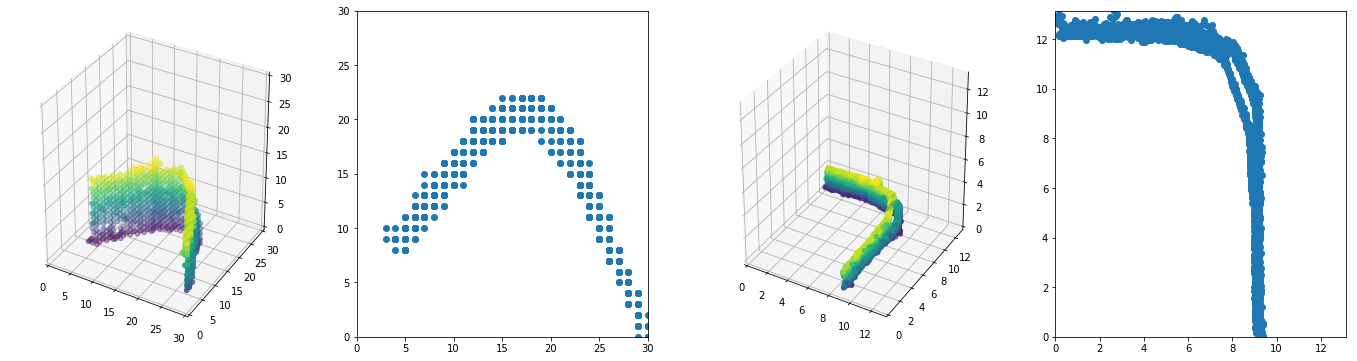

166


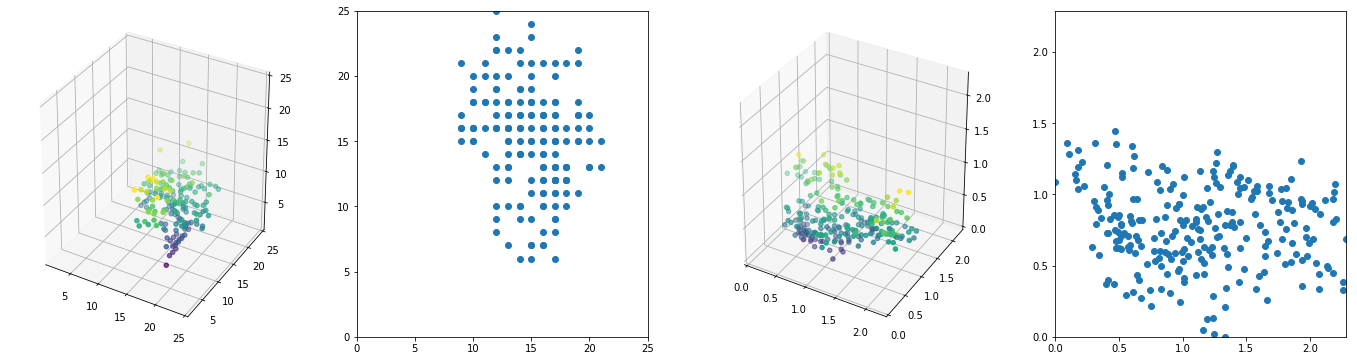

290


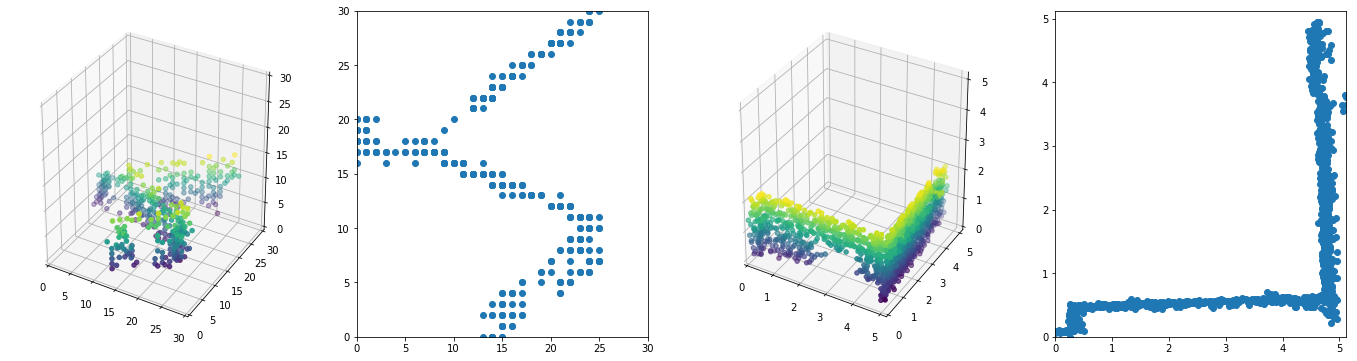

1316


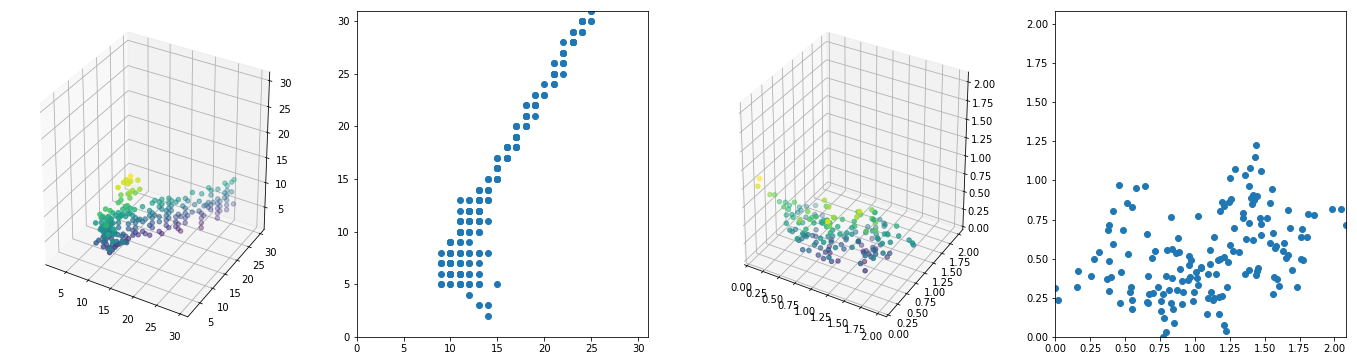

1235


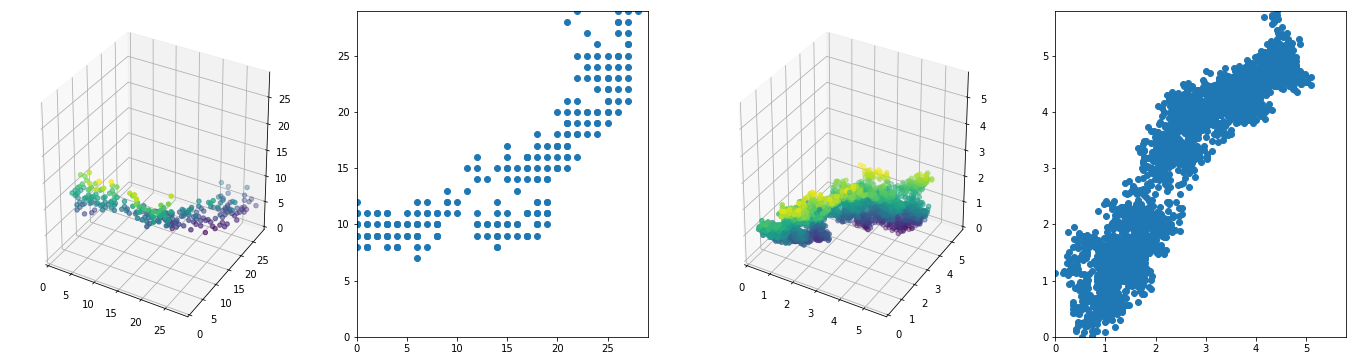

1712


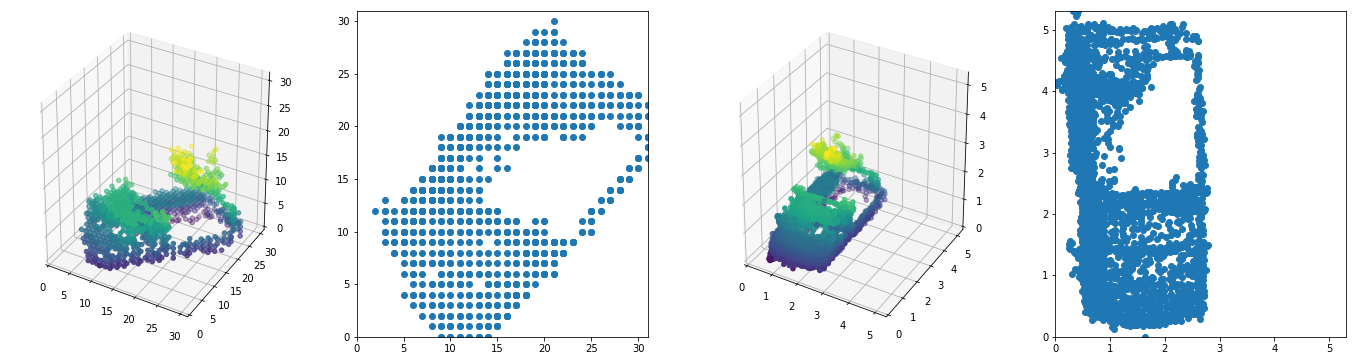

119


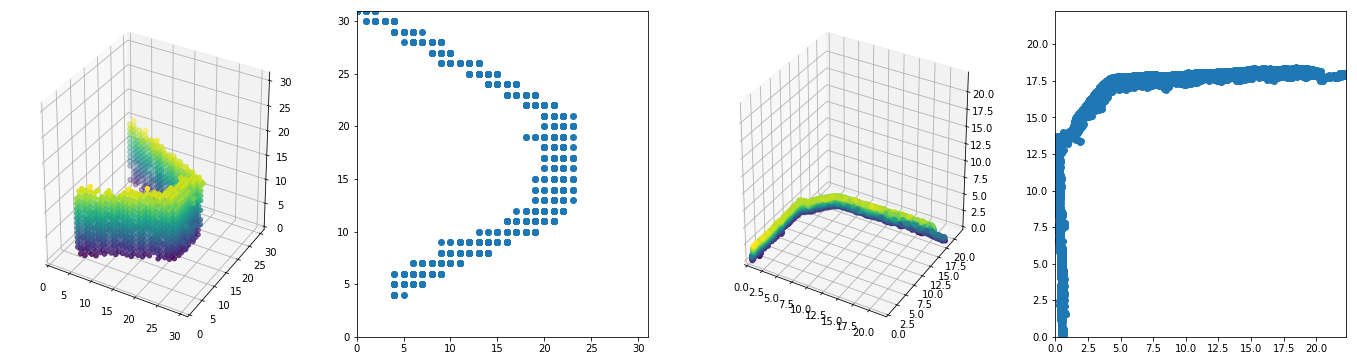

550


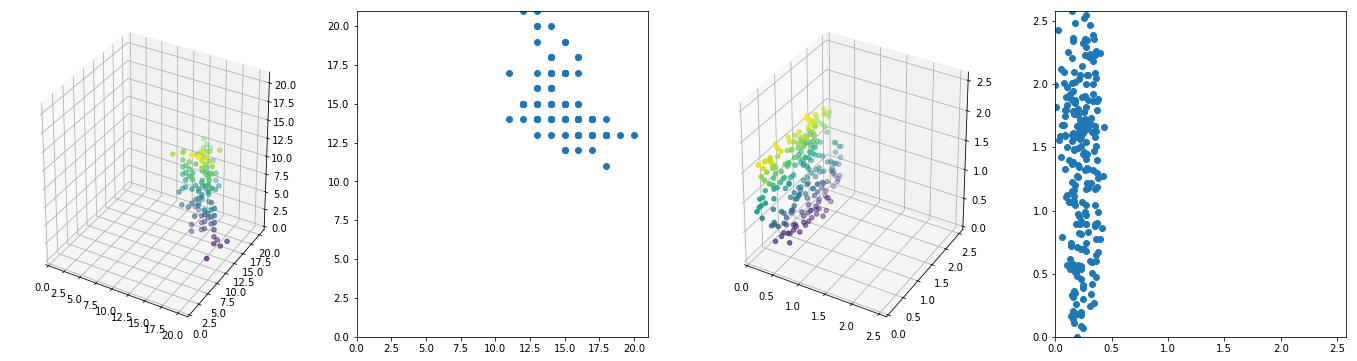

100


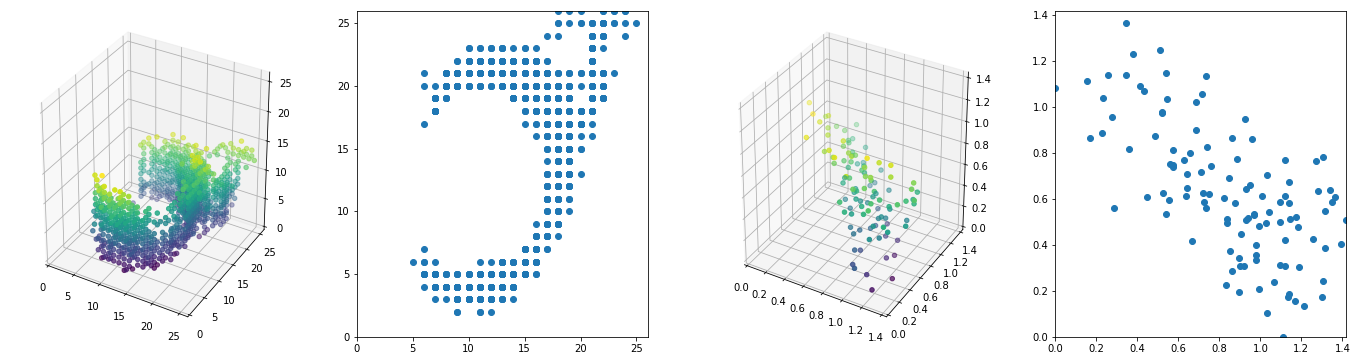

177


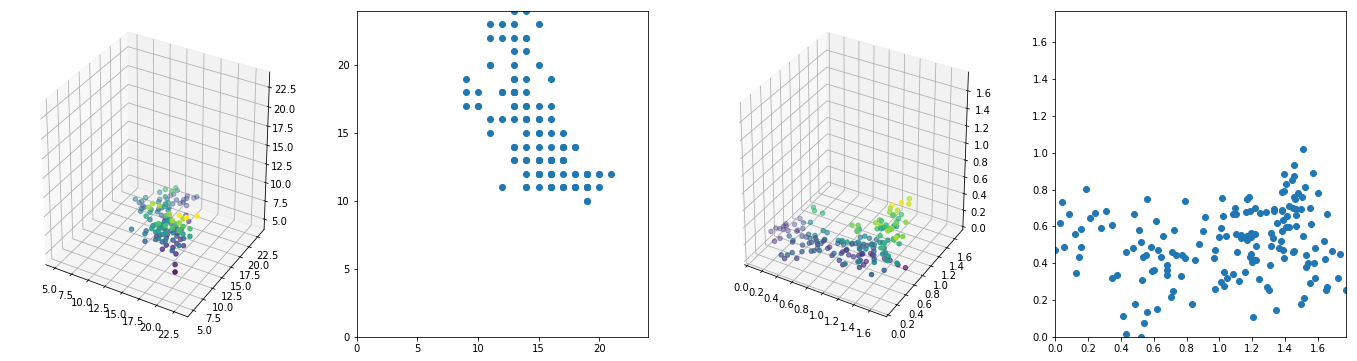

586


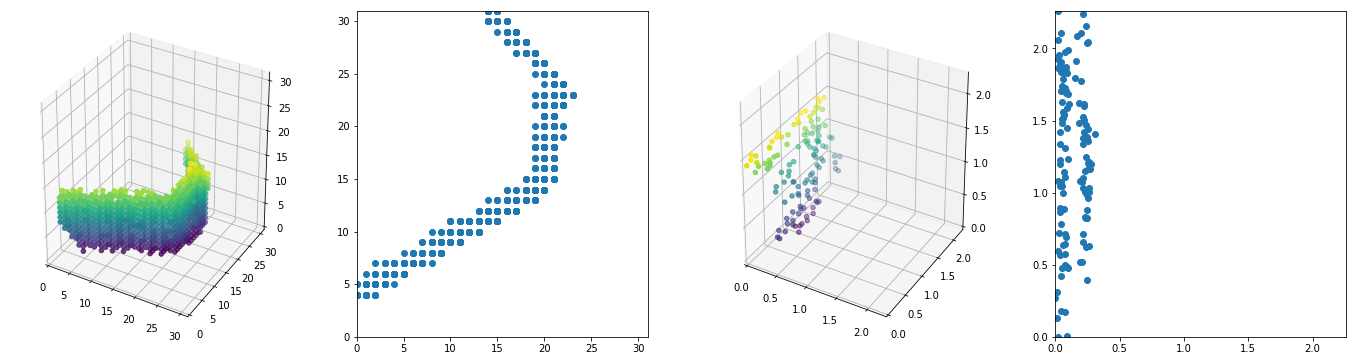

1685


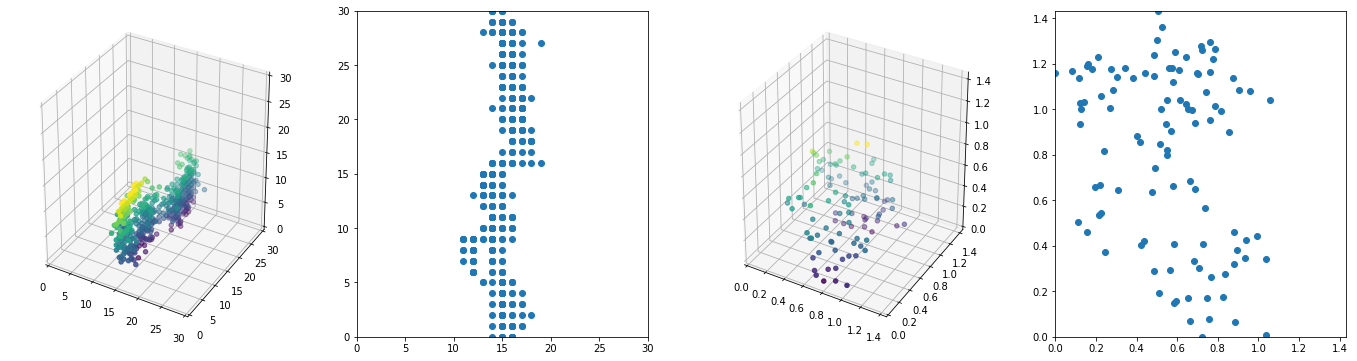

1414


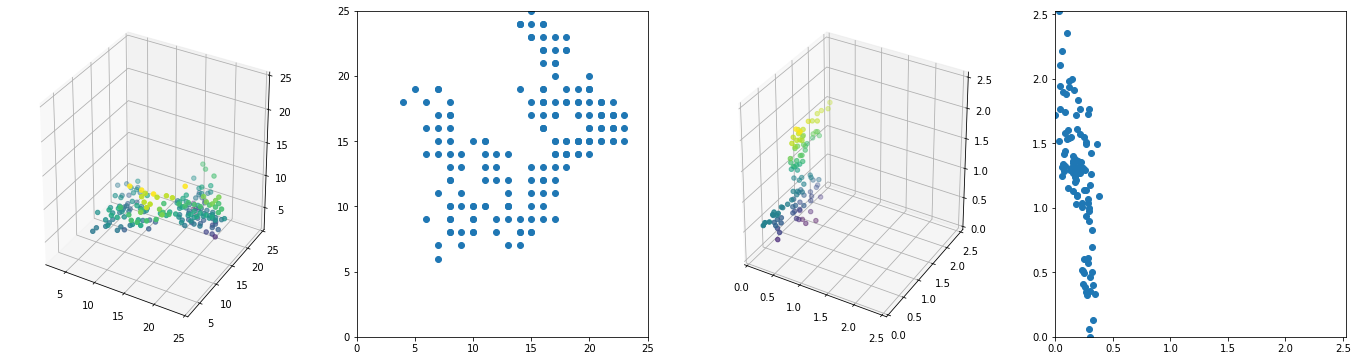

1066


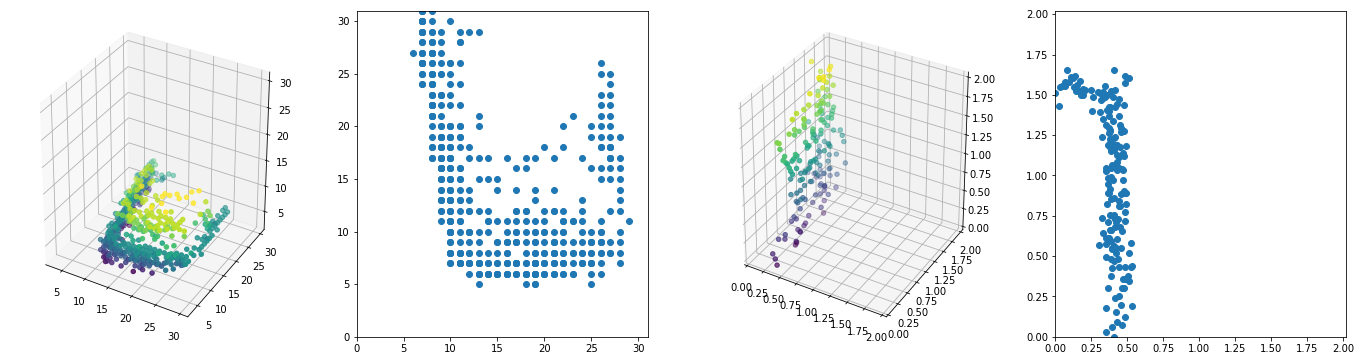

361


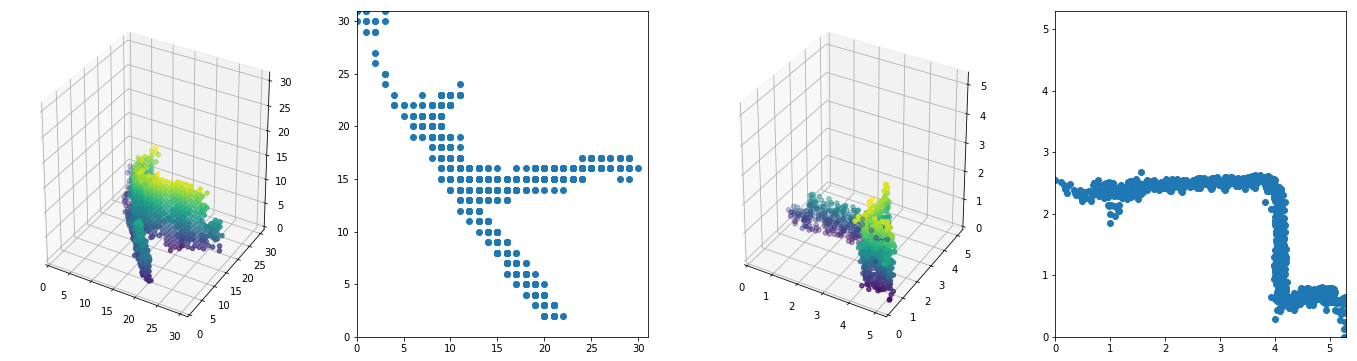

1562


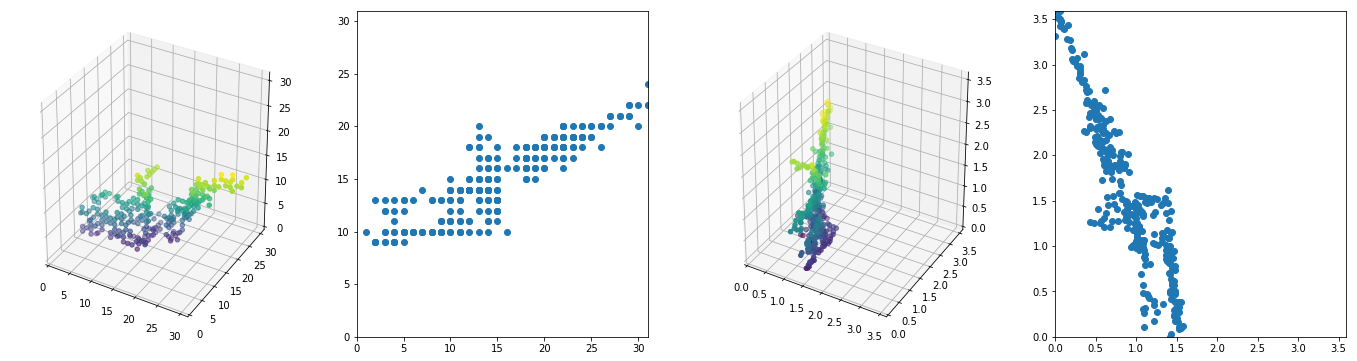

1178


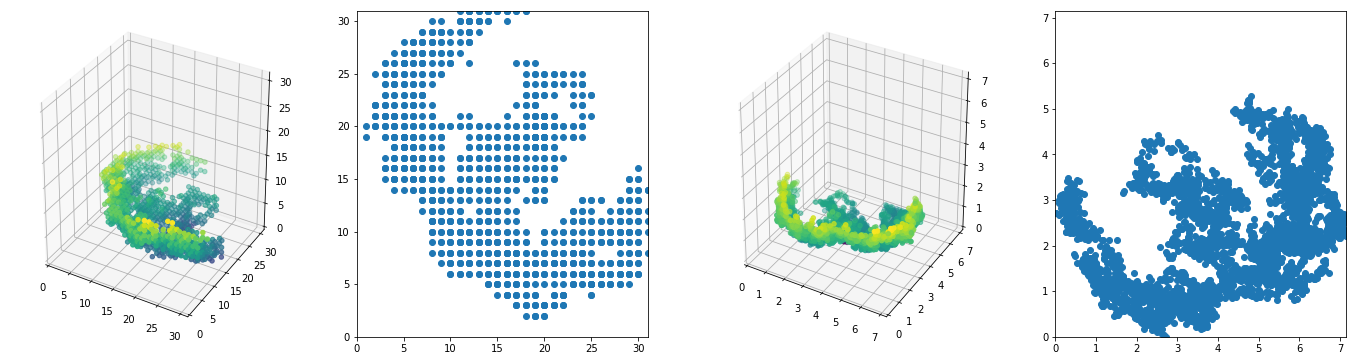

1362


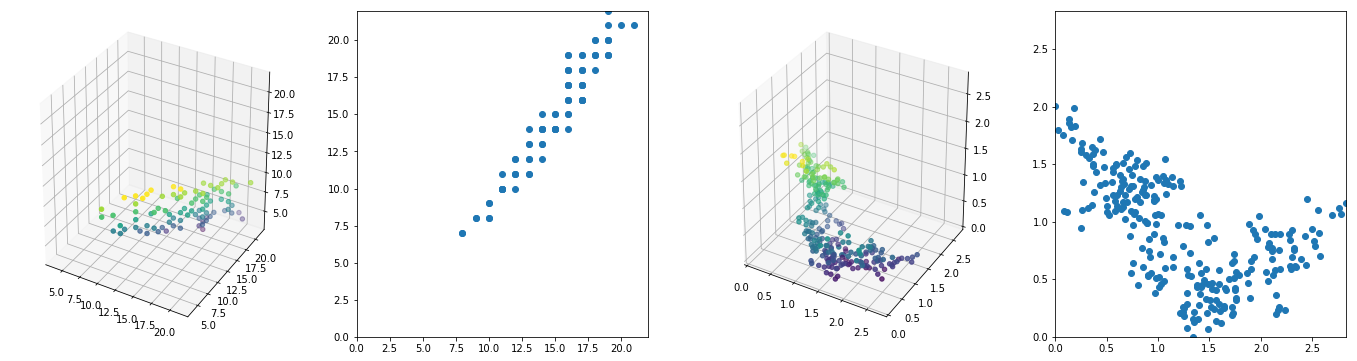

61


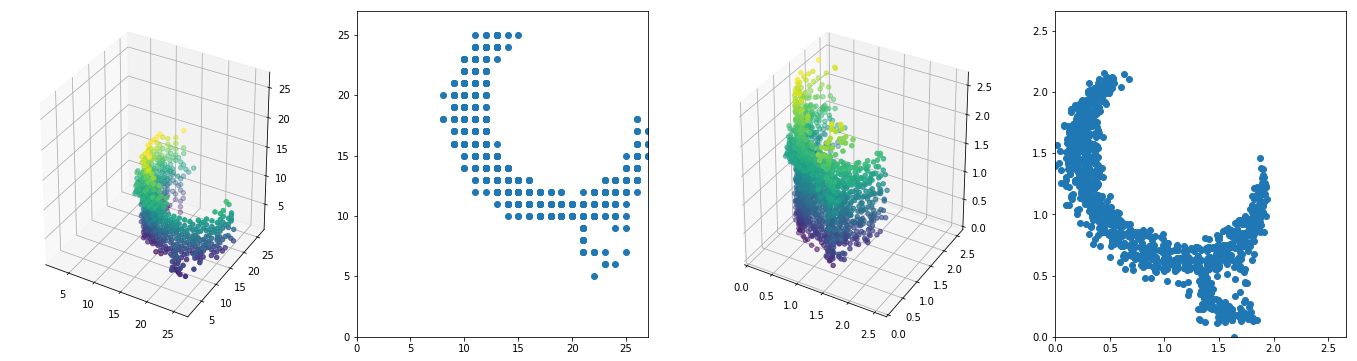

635


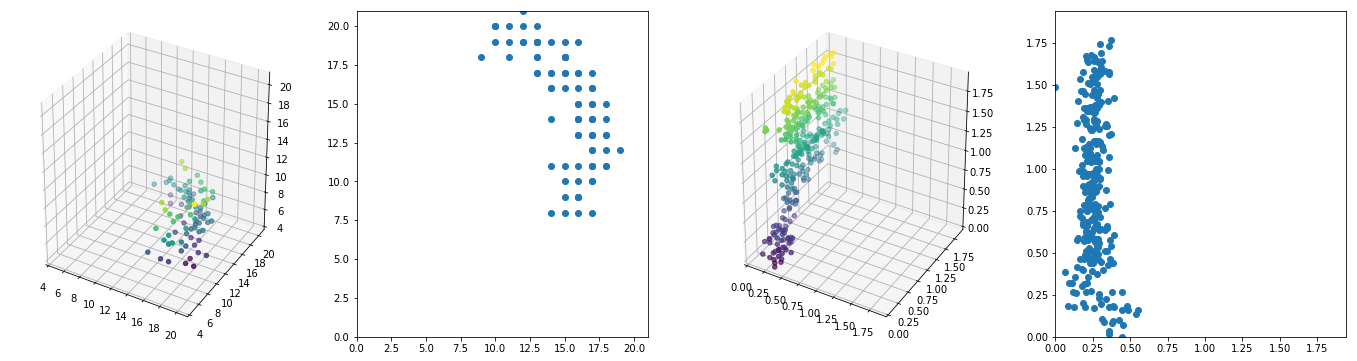

850


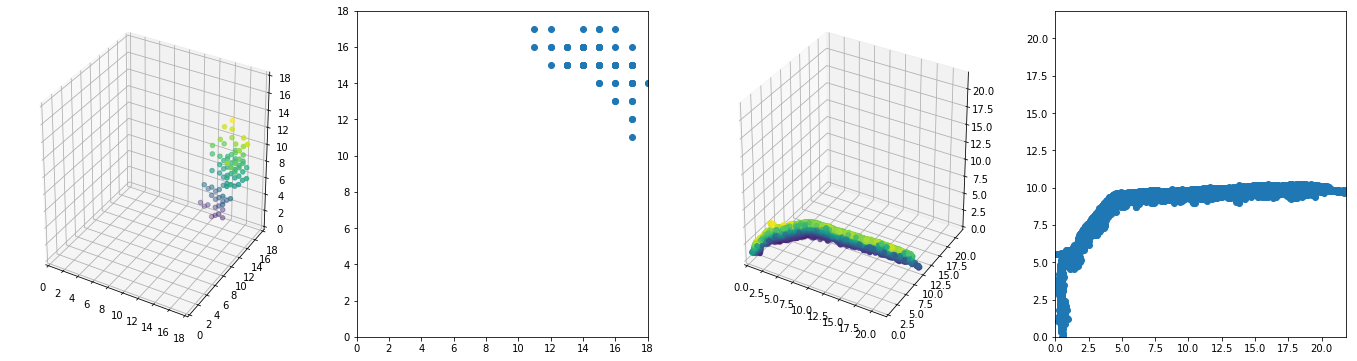

549


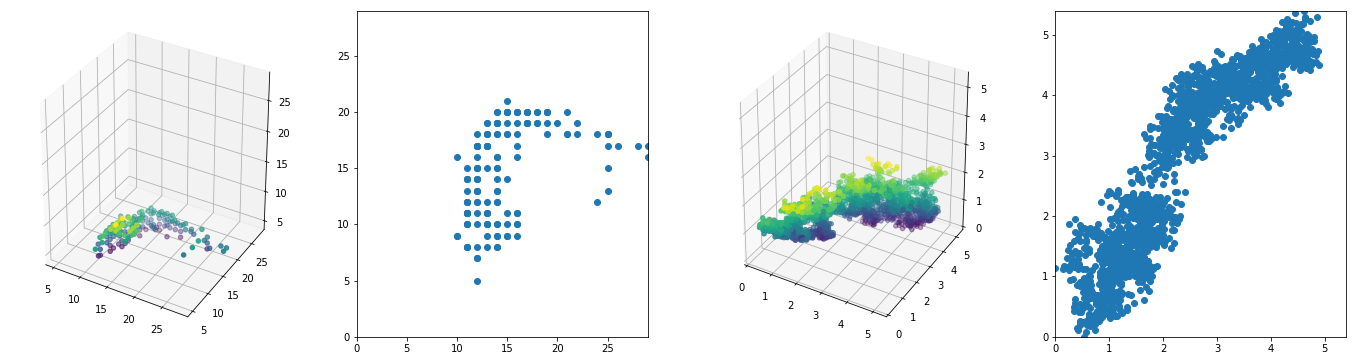

1549


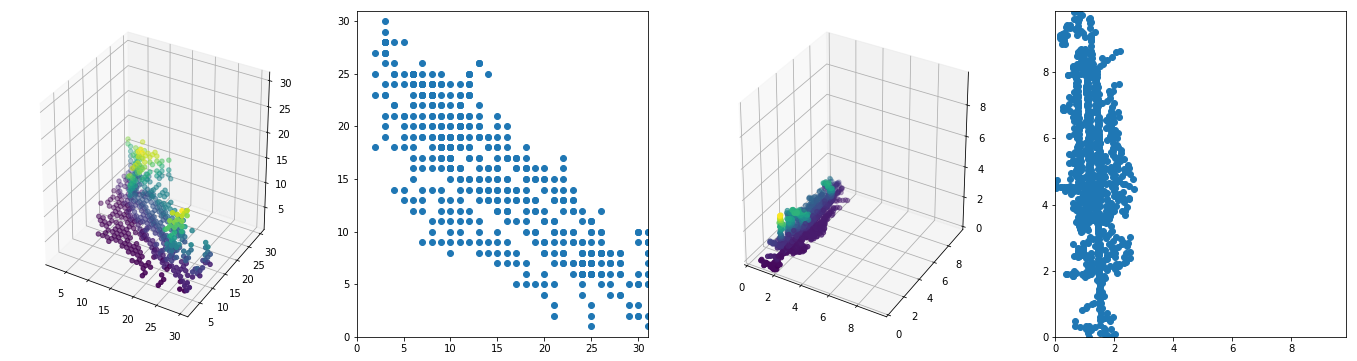

1648


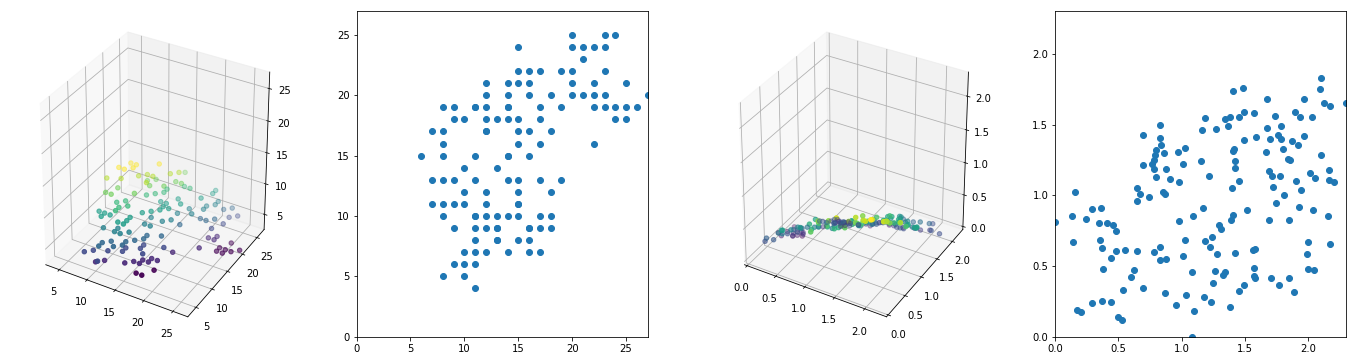

1333


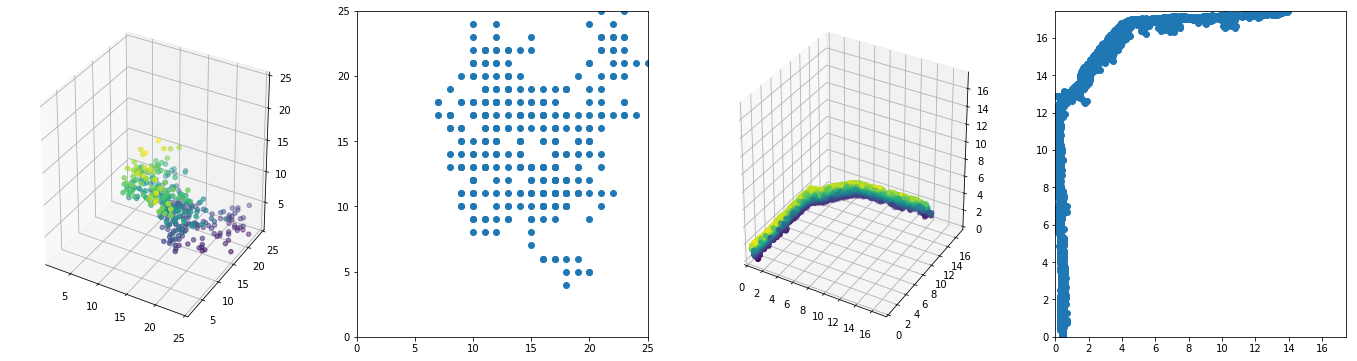

833


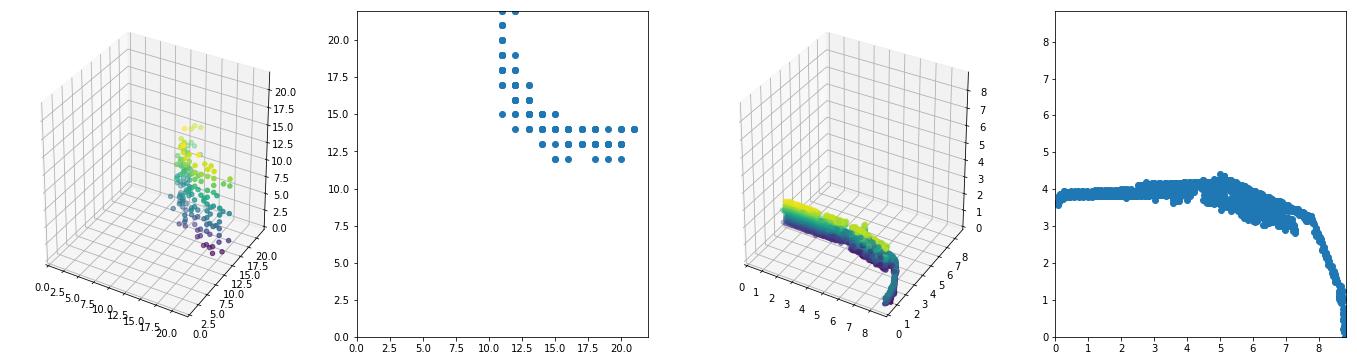

619


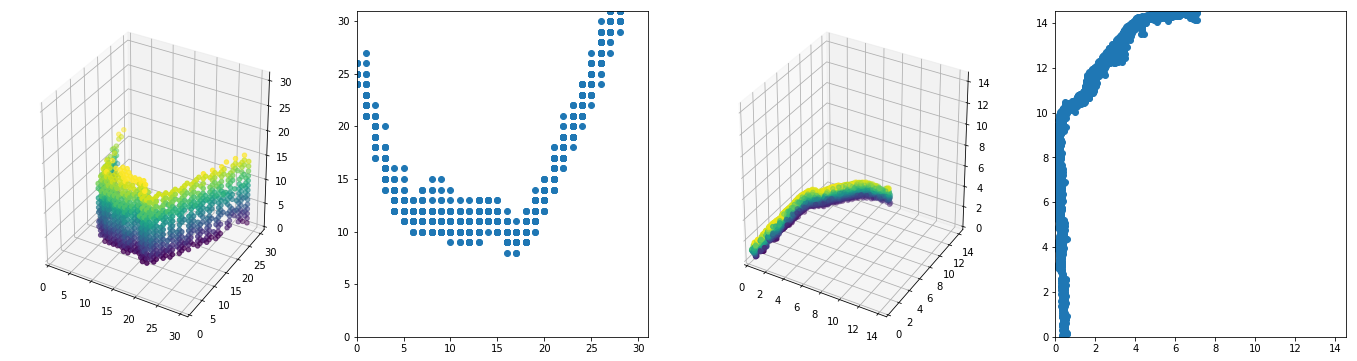

1096


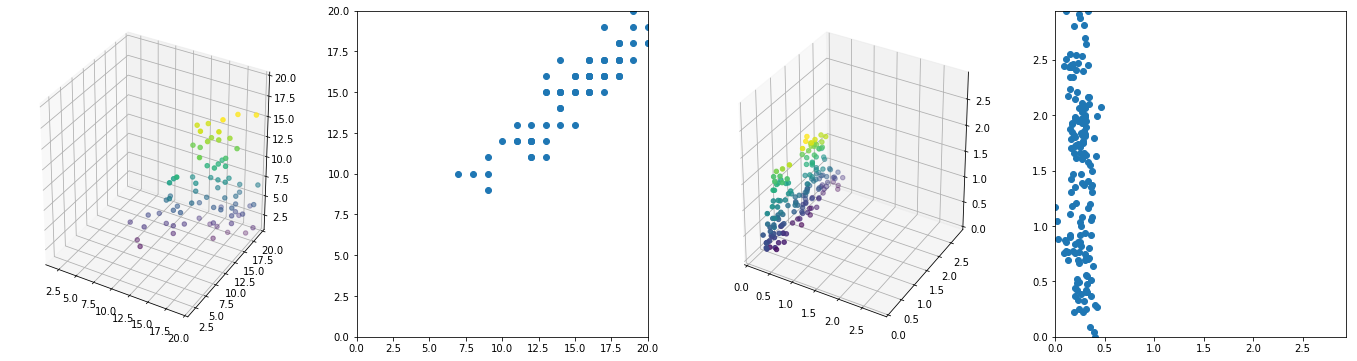

472


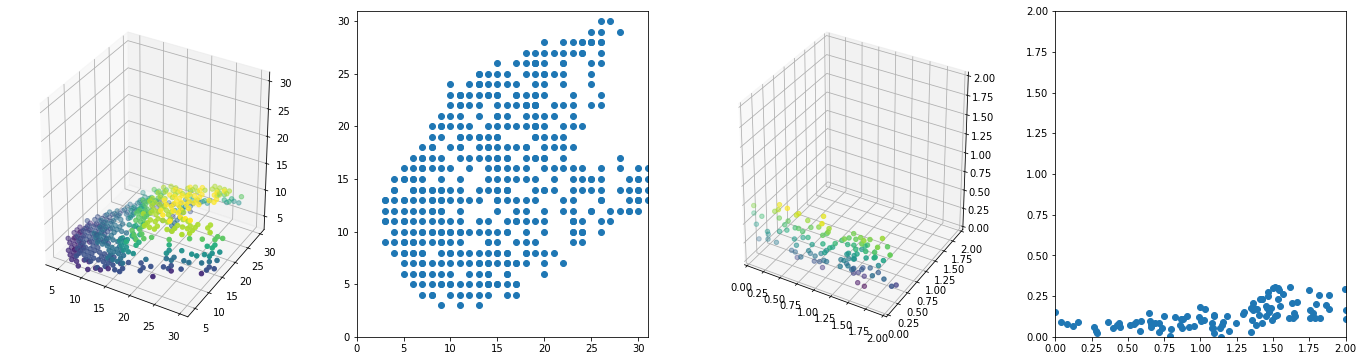

524


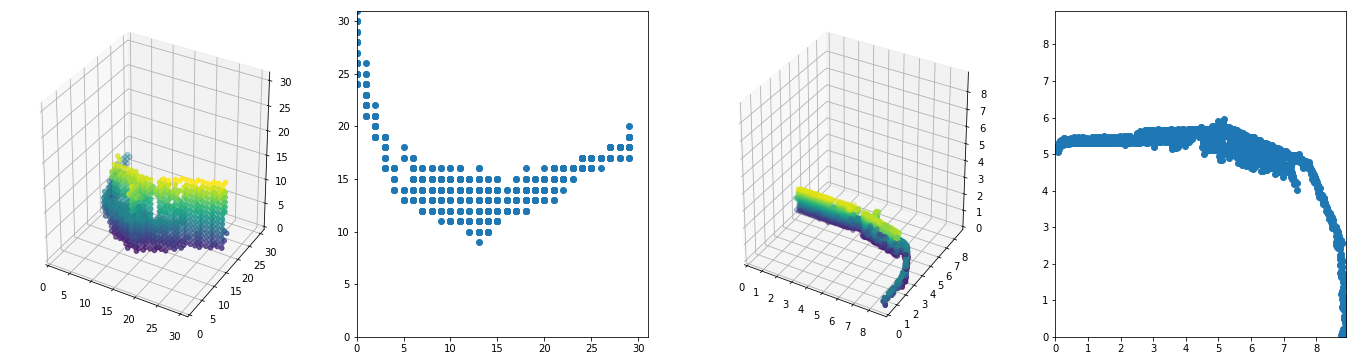

1570


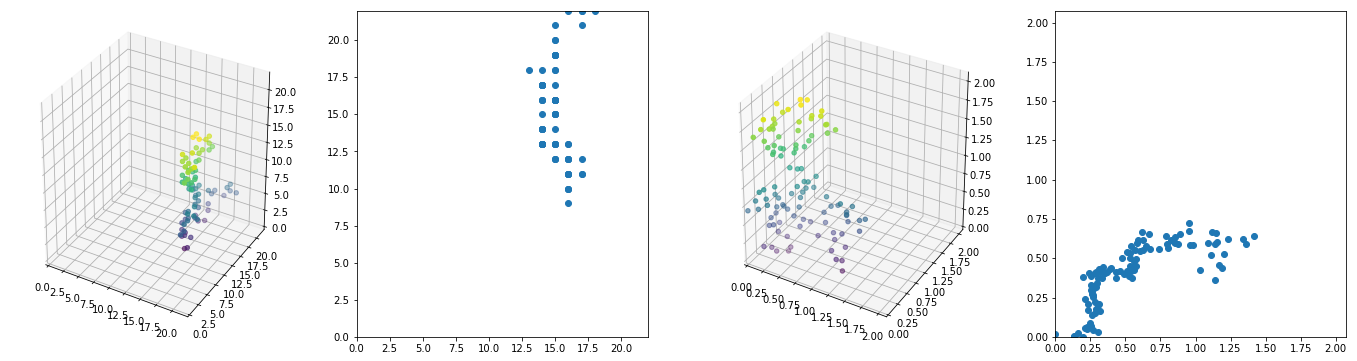

84


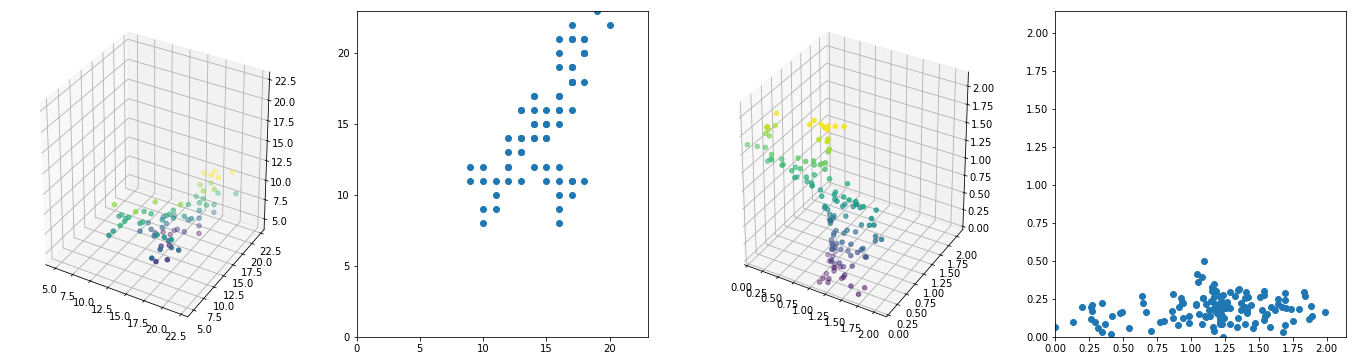

In [37]:
#get processed segments
batch_segments, batch_classes = gen_train.next()
batch_segments=batch_segments.squeeze()    
for i in range(batch_segments.shape[0]):
    
    #obtain number of object in original segment sequence
    id_seg=np.argmax(batch_classes[i])
    
    #convert representation of batch to scatterplot
    segment=[]
    for x in range(batch_segments.shape[1]):
        for y in range(batch_segments.shape[2]):
            for z in range(batch_segments.shape[3]):
                if batch_segments[i,x,y,z]==1:
                    segment.append([x,y,z])
                    
    #plot processed segment
    segment=np.array(segment)
    fig = plt.figure(1,figsize=(24,6))
    plt.clf()

    ax1 = fig.add_subplot(141, projection="3d")

    # Maintain aspect ratio on xy scale
    ax1.set_xlim(np.min(segment[:, :]), np.max(segment[:, :]))
    ax1.set_ylim(np.min(segment[:, :]), np.max(segment[:, :]))
    ax1.set_zlim(np.min(segment[:, :]), np.max(segment[:, :]))

    x, y, z = np.hsplit(segment, segment.shape[1])
    ax1.scatter(x, y, z, c=list(((z-min(z))/max(z)).reshape(-1,)))

    ax2 = fig.add_subplot(142)
    ax2.scatter(x, y)
    ax2.set_xlim(0, np.max(segment[:, :]))
    ax2.set_ylim(0, np.max(segment[:, :]))

    #find original segment
    print(id_seg)
    ind=list(ids).index(id_seg)
    
    #plot original segment
    segment=segments[ind]
    segment = segment - np.min(segment, axis=0)
    ax3 = fig.add_subplot(143, projection="3d")

    # Maintain aspect ratio on xy scale
    ax3.set_xlim(0, np.max(segment[:, :]))
    ax3.set_ylim(0, np.max(segment[:, :]))
    ax3.set_zlim(0, np.max(segment[:, :]))

    x, y, z = np.hsplit(segment, segment.shape[1])
    ax3.scatter(x, y, z, c=list(((z-min(z))/max(z)).reshape(-1,)))

    ax4 = fig.add_subplot(144)
    ax4.scatter(x, y)
    ax4.set_xlim(0, np.max(segment[:, :]))
    ax4.set_ylim(0, np.max(segment[:, :]))

    plt.show()

# Visualization and relabelling

For relabelling set RELABEL = True

## Dataset18

Default is 0:other.
Type q and then ENTER to quit.


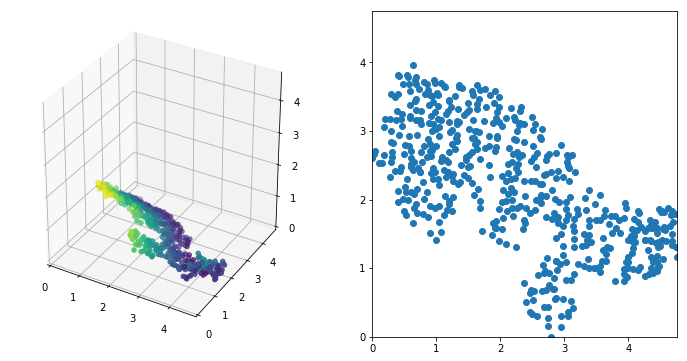

other


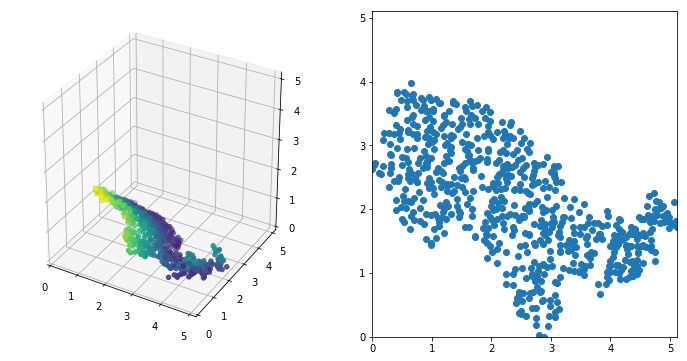

other


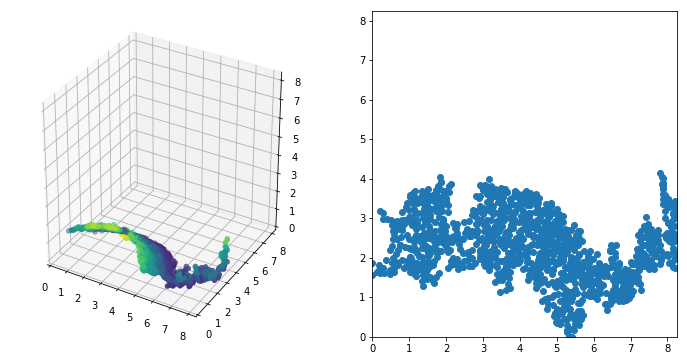

other


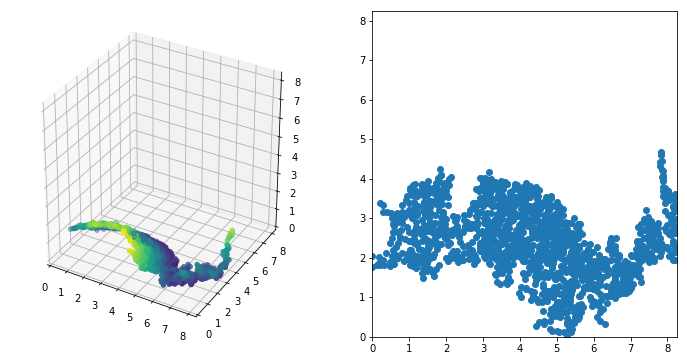

building


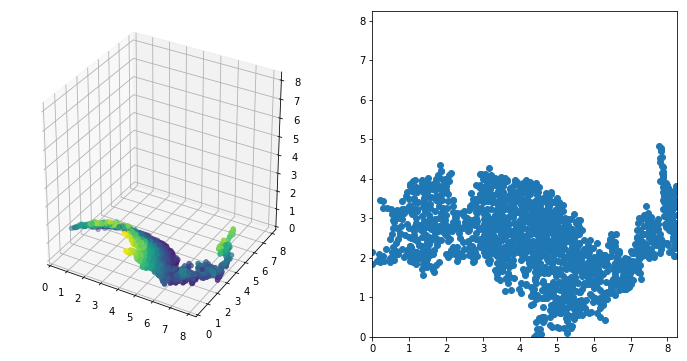

other


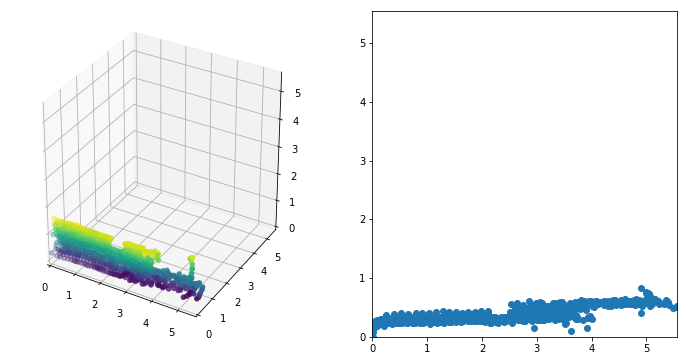

other


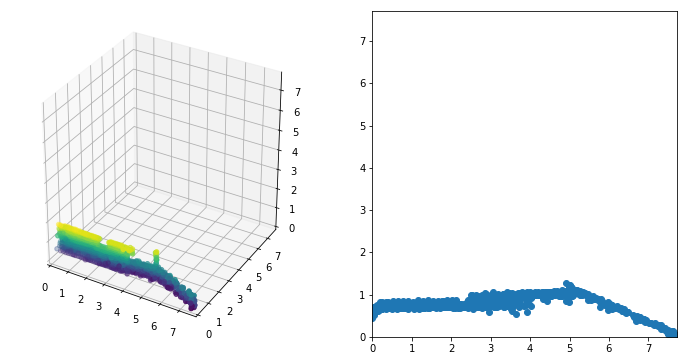

other


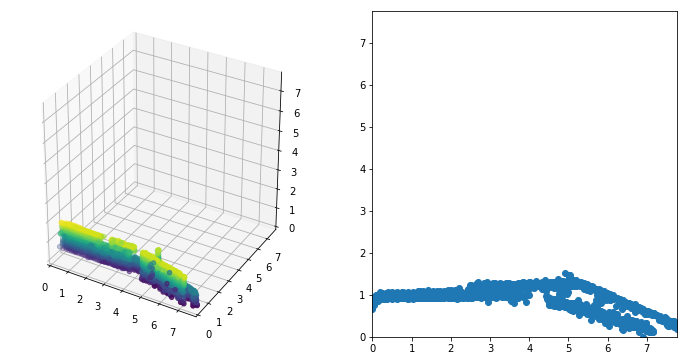

other


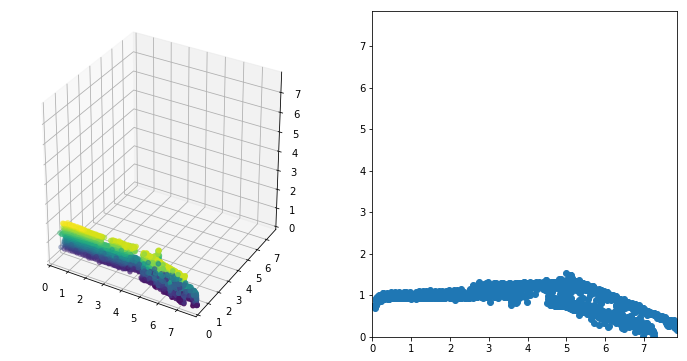

other


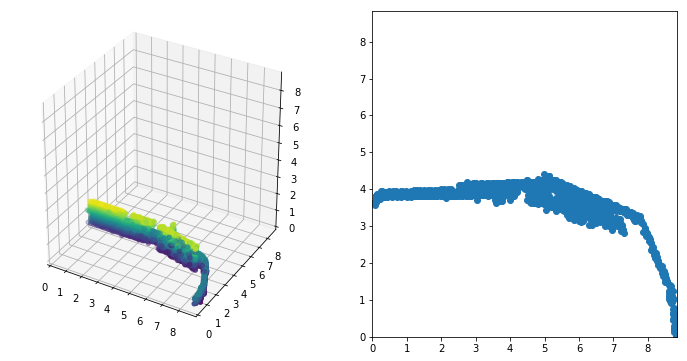

building


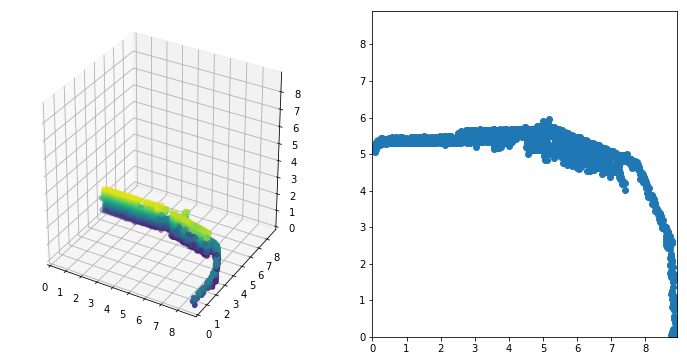

other


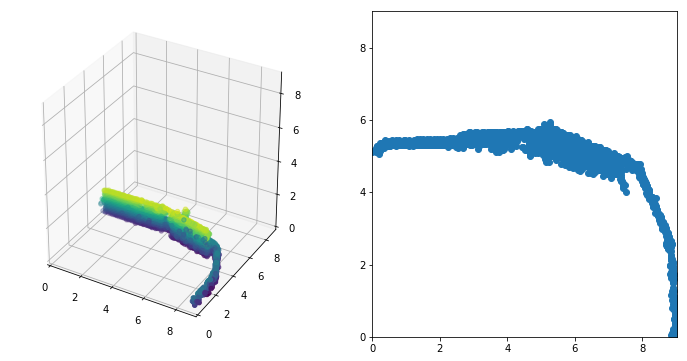

other


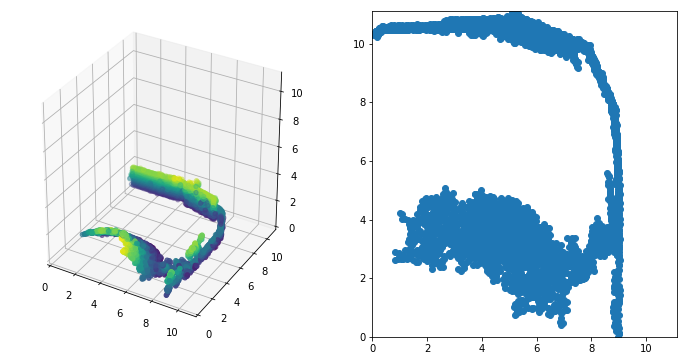

other


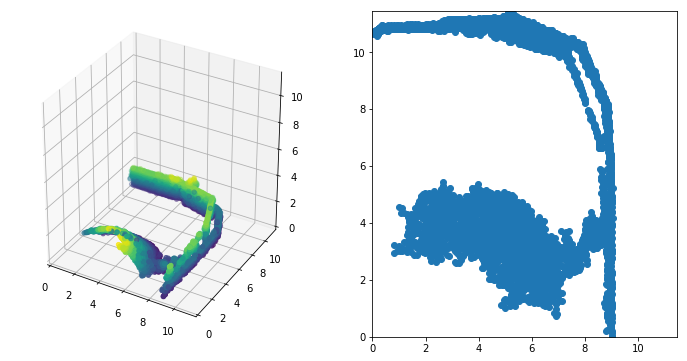

building


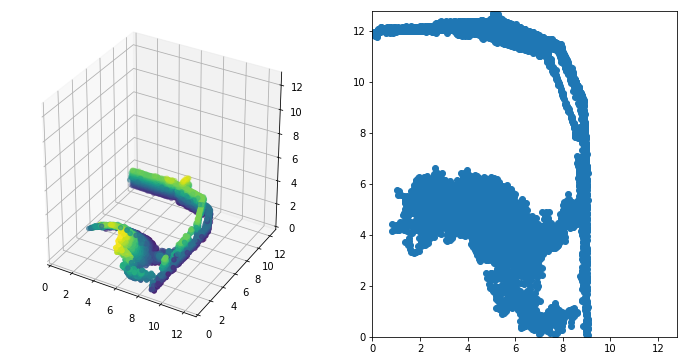

other


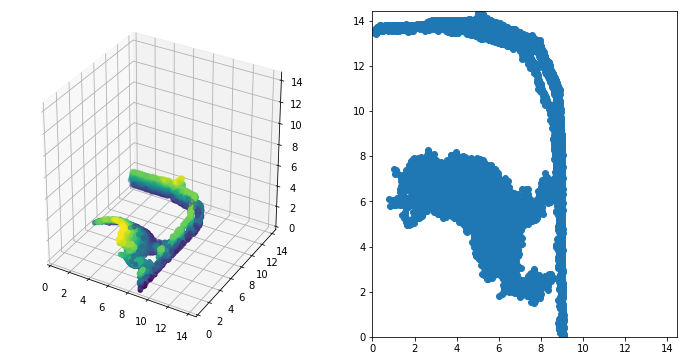

other


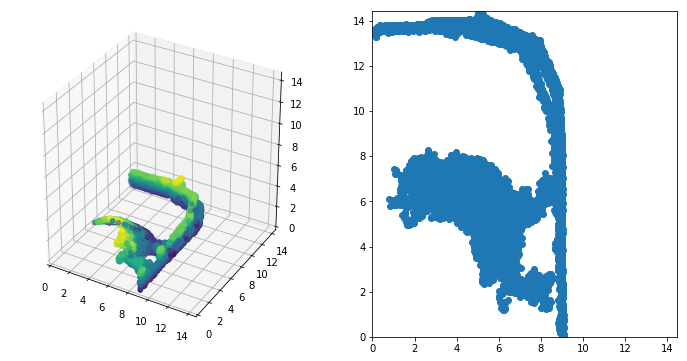

building


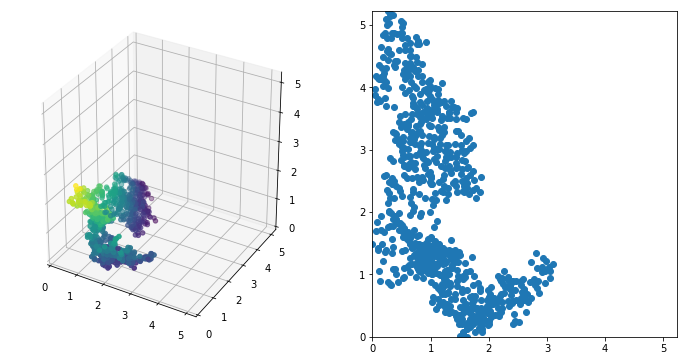

other


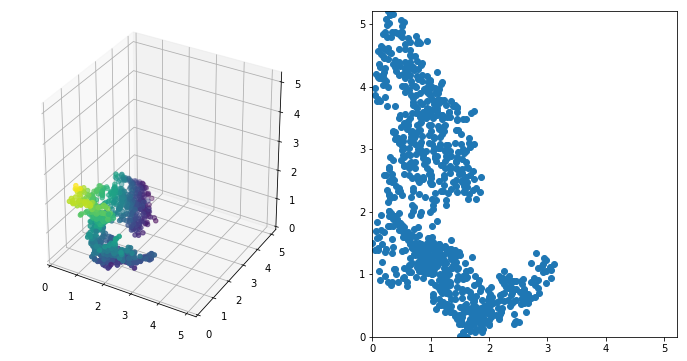

other


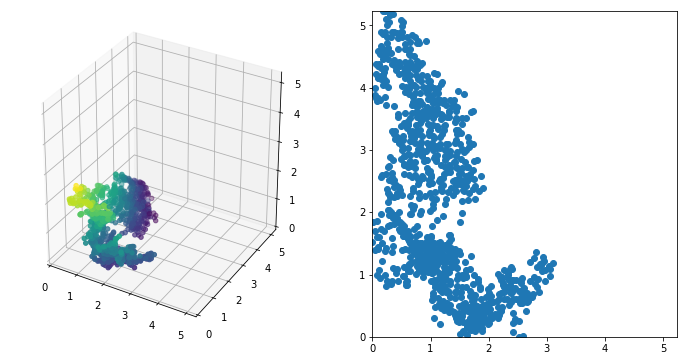

building


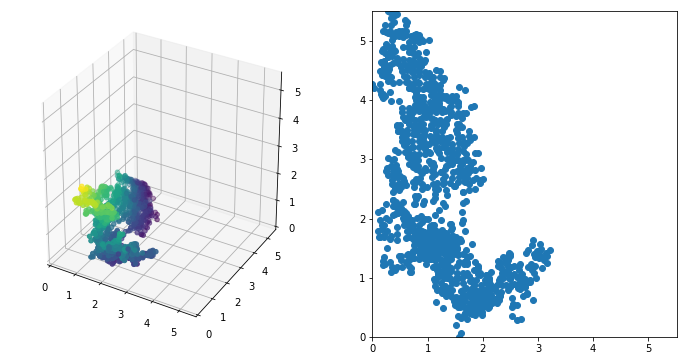

building


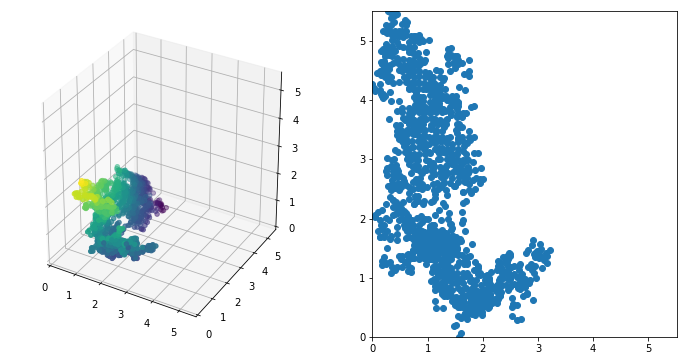

building


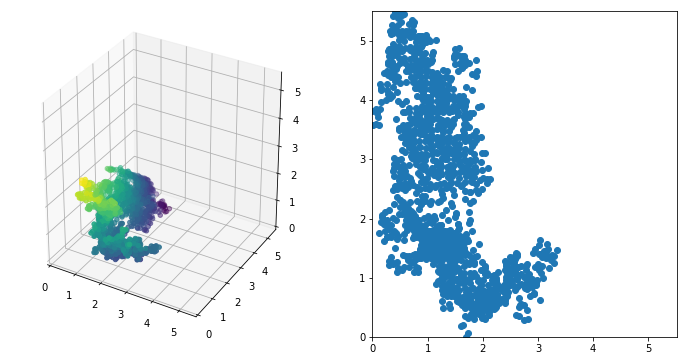

other


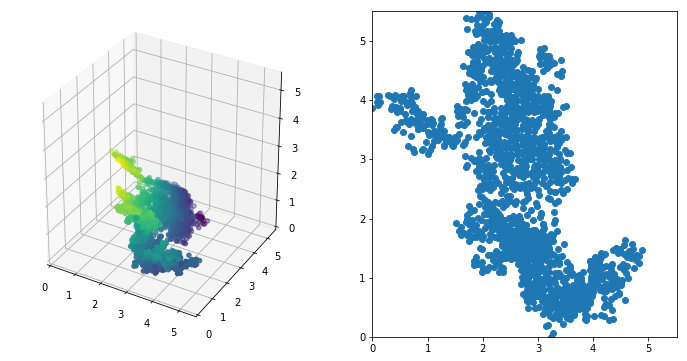

other


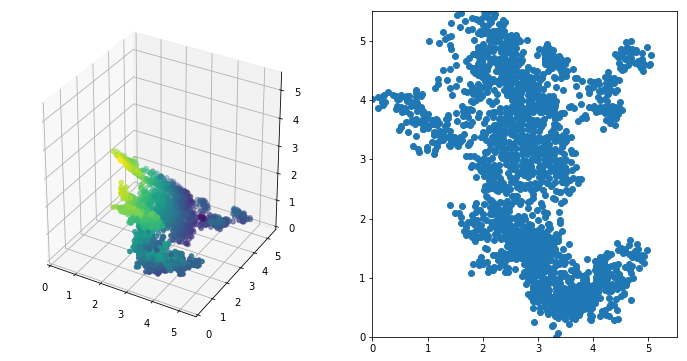

building


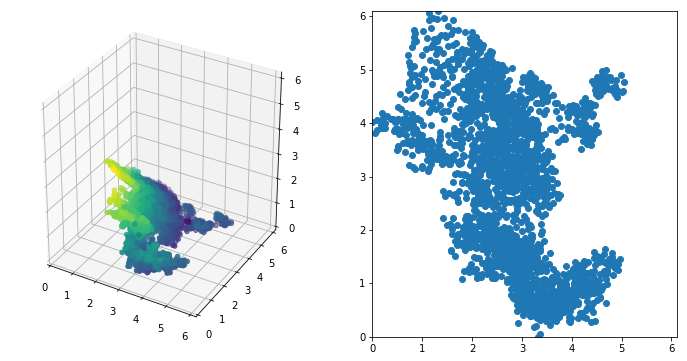

building


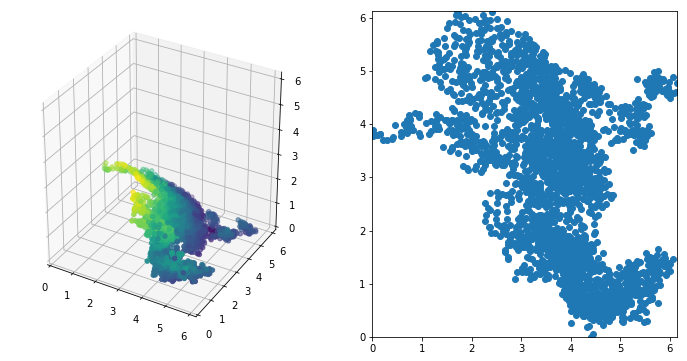

building


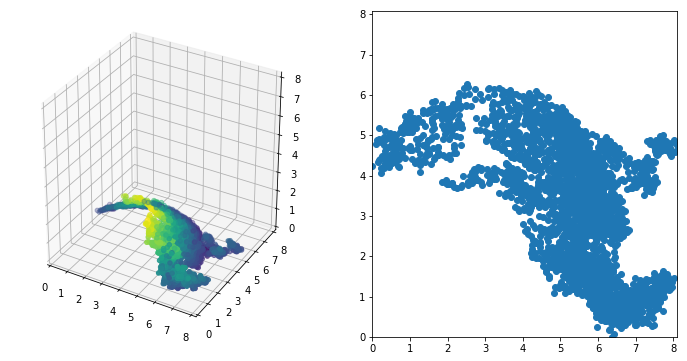

building


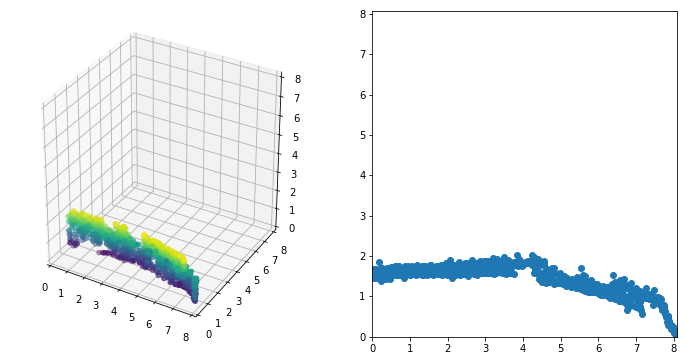

building


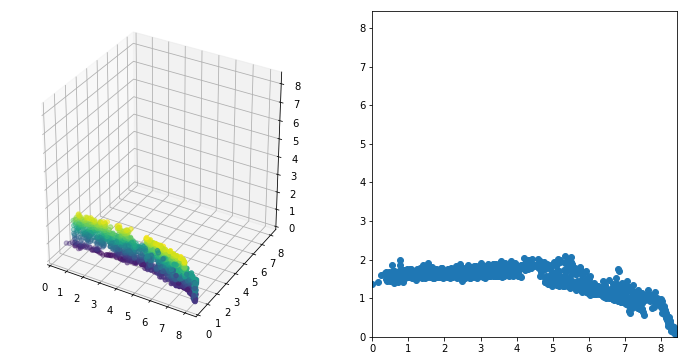

other


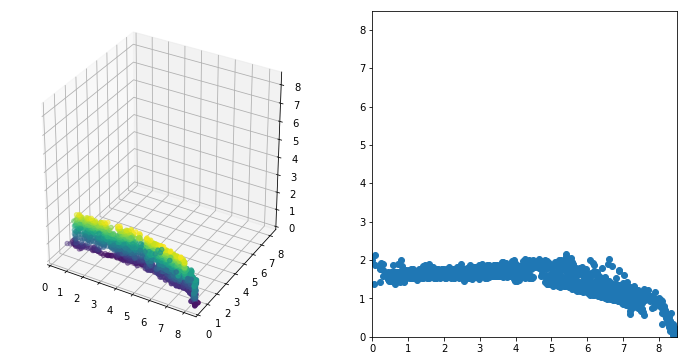

building


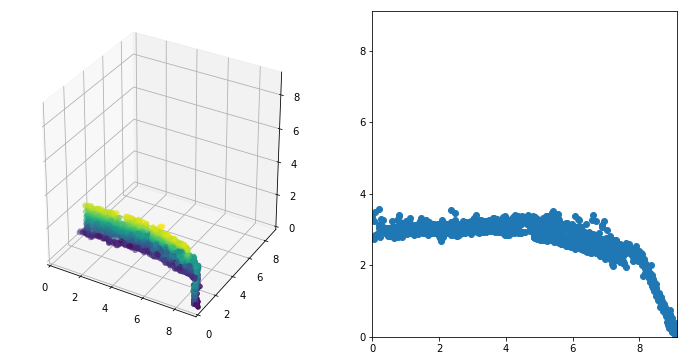

other


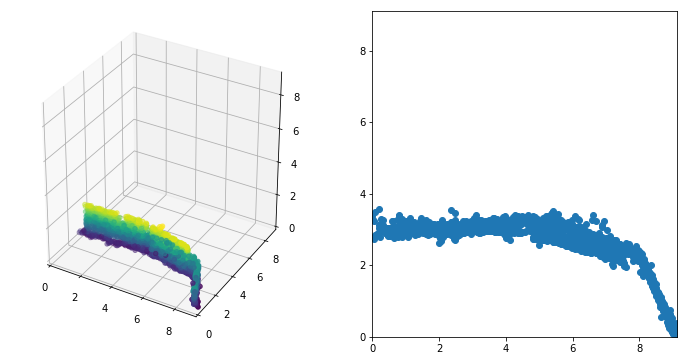

other


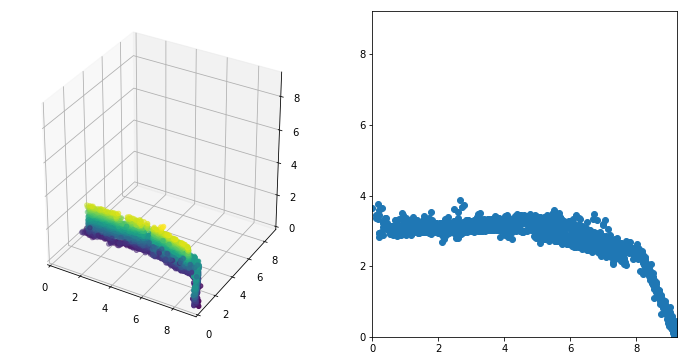

other


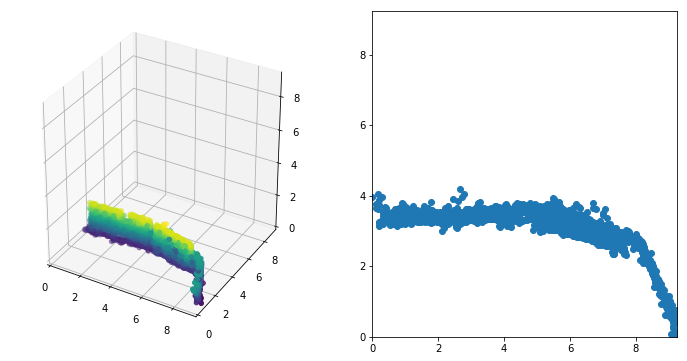

building


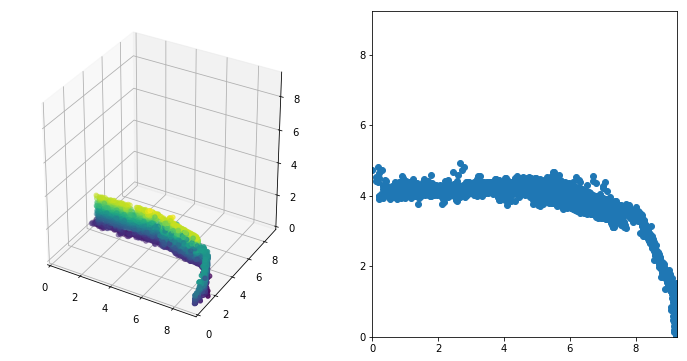

other


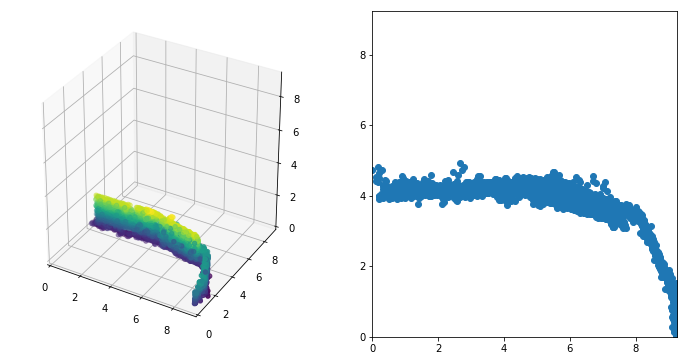

other


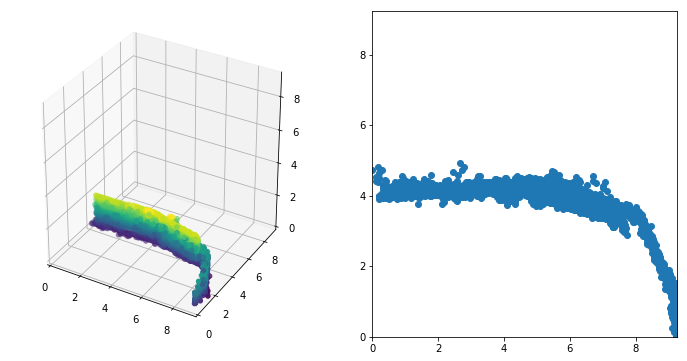

building


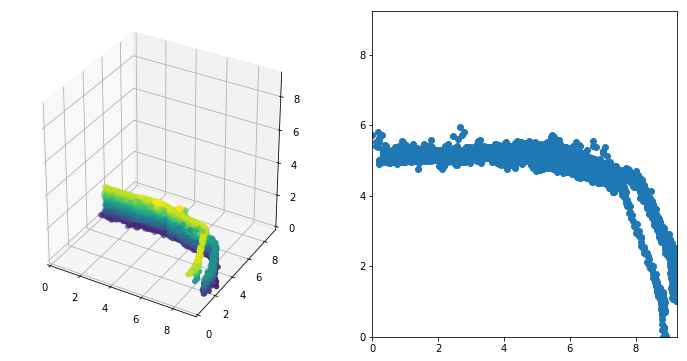

other


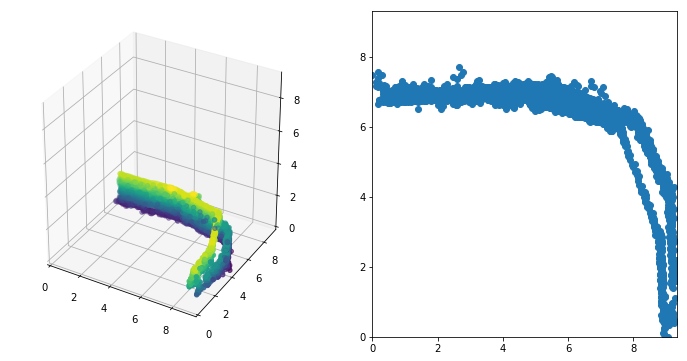

other


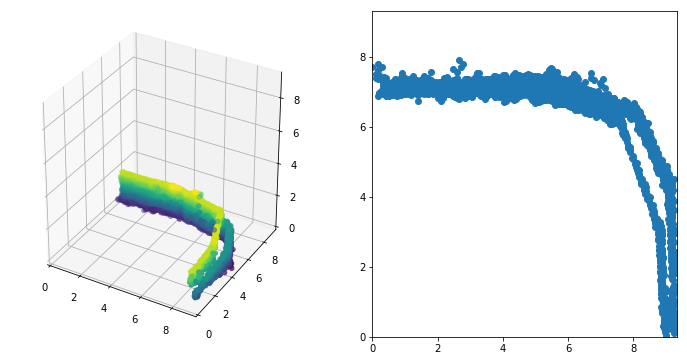

building


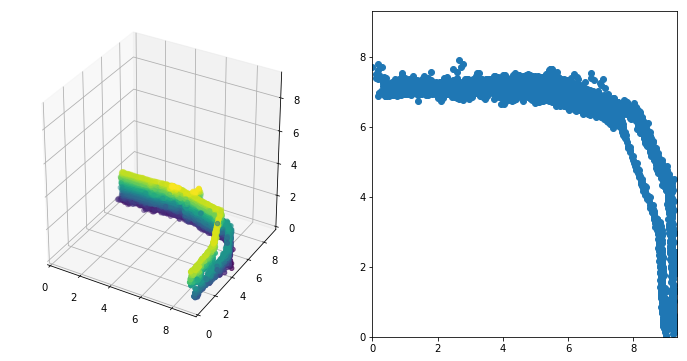

other


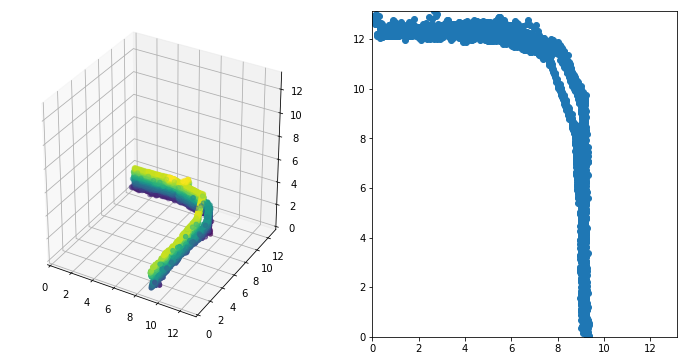

other


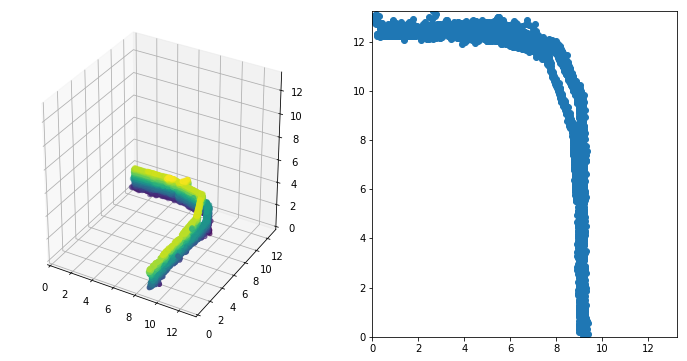

building


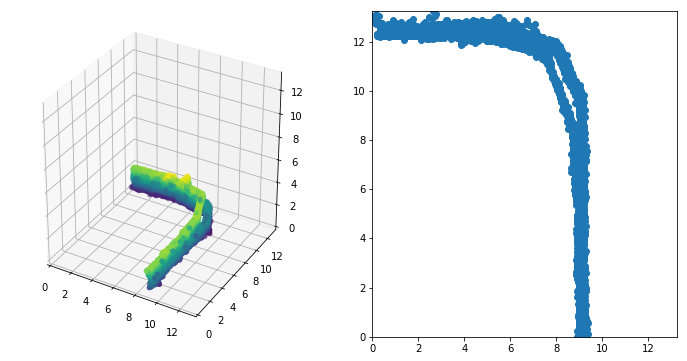

other


KeyboardInterrupt: 

In [108]:

RELABEL = False
AUTOWALLS = False
CLASS = 1
CLASSES = ["other", "car", "building"]

lids = data18.lids
lids_lookup = dict()
for i, lid in enumerate(lids):
    lids_lookup[lid] = i
labels = data18.labels
segments=data18.segments

if RELABEL:
    default_label = CLASS
    n_objects = np.sum(labels == CLASS)
    print("There are " + str(n_objects) + " " + CLASSES[CLASS] + "(s).")
else:
    default_label = 0
    fp_labels = open( os.path.join(folder, "labels_database.csv"), "a")
    

print("Default is " + str(default_label) + ":" + CLASSES[default_label] + ".")
print("Type q and then ENTER to quit.")
for i in range(ids.size):
    # skip if it's not the last duplicate
    if i + 1 < ids.size and ids[i] == ids[i + 1]:
        continue

    if RELABEL:
        if not ids[i] in lids_lookup or labels[lids_lookup[ids[i]]] != CLASS:
            continue
#     else:
#         if ids[i] in lids_lookup:
#             continue

    fig = plt.figure(1,figsize=(12,6))
    plt.clf()

    ax = fig.add_subplot(121, projection="3d")

    segment = segments[i]
    segment = segment - np.min(segment, axis=0)

    # Maintain aspect ratio on xy scale
    ax.set_xlim(0, np.max(segment[:, :]))
    ax.set_ylim(0, np.max(segment[:, :]))
    ax.set_zlim(0, np.max(segment[:, :]))

    x, y, z = np.hsplit(segment, segment.shape[1])
    ax.scatter(x, y, z, c=list(((z-min(z))/max(z)).reshape(-1,)))

    ax = fig.add_subplot(122)
    ax.scatter(x, y)
    ax.set_xlim(0, np.max(segment[:, :]))
    ax.set_ylim(0, np.max(segment[:, :]))

    plt.draw()
    plt.pause(0.001)
    
    print(CLASSES[labels_dict[ids[i]]])

    if not RELABEL: 
        continue
    while True:
        # autolabel
        if AUTOWALLS and not RELABEL:
            max_x = max(segment[:, 0])
            min_x = min(segment[:, 0])
            max_y = max(segment[:, 1])
            min_y = min(segment[:, 1])

            dist = np.linalg.norm([max_x - min_x, max_y - min_y])

            if dist > 6:
                print(str(ids[i]) + " autolabeled as wall")
                label = 2
                break

        # consider user input
        label = input(str(ids[i]) + " label: ")

        if not label:
            label = default_label
            break
        if label in ["0", "1", "2", "q"]:
            break

    if label == "q":
        break

    if RELABEL:
        labels[lids_lookup[ids[i]]] = label
    else:
        fp_labels.write(str(ids[i]) + " " + str(label) + "\n")
        fp_labels.flush()

if RELABEL:
    fp_labels = open(os.path.join(folder, "labels_database.csv"), "w")
    for lid, label in zip(lids, labels):
        fp_labels.write(str(lid) + " " + str(label) + "\n")
fp_labels.close()

In [13]:
feature_names

['linearity',
 'planarity',
 'scattering',
 'omnivariance',
 'anisotropy',
 'eigen_entropy',
 'change_of_curvature',
 'pointing_up',
 'cnn_0',
 'cnn_1',
 'cnn_2',
 'cnn_3',
 'cnn_4',
 'cnn_5',
 'cnn_6',
 'cnn_7',
 'cnn_8',
 'cnn_9',
 'cnn_10',
 'cnn_11',
 'cnn_12',
 'cnn_13',
 'cnn_14',
 'cnn_15',
 'cnn_16',
 'cnn_17',
 'cnn_18',
 'cnn_19',
 'cnn_20',
 'cnn_21',
 'cnn_22',
 'cnn_23',
 'cnn_24',
 'cnn_25',
 'cnn_26',
 'cnn_27',
 'cnn_28',
 'cnn_29',
 'cnn_30',
 'cnn_31',
 'cnn_scale_x',
 'cnn_scale_y',
 'cnn_scale_z']

In [39]:
fp_labels.close()